# Lab Assignment 5: Wide and Deep Network Architectures

#### by: Makos, Malgorzata Z. and Mahajan, Richa

### Bussines Understanding

#### Data Set Overview

In recent years machine learning has developed a number of emerging applications suitable for life science. These days, machine learning plays a key role in many health-related realms, including the development of new medical procedures, the handling of patient data and records and the treatment of chronic diseases. <br>

In this lab assignment, we will use the patient record data set in order to determine whether the patient is in the risk group to have heart disease. The data set was downloaded from Kaggle.com and originally had 13 columns and 70’000 rows. The 13 columns described the results of medical examination ( weight, height, systolic and diastolic blood pressure, cholesterol, and glucose) and subjective information was given by the patient (smoking, alcohol intake, and physical activity). The target column shows the presence or absence of cardiovascular disease.  Most of the columns have different categorical features. 

#### The Purpose of the Data Set
Cardiovascular disease generally refers to conditions that involve narrowed or blocked blood vessels that can lead to a heart attack, chest pain (angina) or stroke.
Many people are not diagnosed with cardiovascular disease until they have a heart attack, angina, stroke or heart failure. Therefore, machine learning is used to predict illness at an early stage, which is important for doctors and patients to intervene earlier. A good machine learning algorithm should help doctors make quicker and more accurate diagnoses. <br>

Many medical centers and companies around the world already include machine learning in ultra-modern medicine. For them, it would be interesting to have a sufficient algorithm that will classify whether a patient will have a cardio disease. 
On the other hand, having this algorithm implemented as an app would be helpful for the patients for a self-diagnosis and determination whether he/she is in the risk group to have heart disease. 

### Data Preparation

In [1]:
import numpy as np
import pandas as pd
import missingno as mn
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv('Cardio_train_Risk_Group.csv')
df.head()

,ID,Gender,Age,Height,Weight,Cholesterol,Systolic_BloodPressure,Diastolic_BloodPressure,Glucose,Smoking,Alcohol_intake,Physical_activity,Cardio_disease
0,1000,men,50,168,62.0,normal,110,80,normal,no,no,yes,no
1,1001,women,55,156,85.0,well above normal,140,90,normal,no,no,yes,yes
2,1002,women,51,165,64.0,well above normal,130,70,normal,no,no,no,yes
3,1003,men,48,169,82.0,normal,150,100,normal,no,no,yes,yes
4,1004,women,47,156,56.0,normal,100,60,normal,no,no,no,no


In [3]:
print('Cardio Data Dimensions:', df.shape)
print(df.info())

Cardio Data Dimensions: (70000, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
ID                         70000 non-null int64
Gender                     70000 non-null object
Age                        70000 non-null int64
Height                     70000 non-null int64
Weight                     70000 non-null float64
Cholesterol                70000 non-null object
Systolic_BloodPressure     70000 non-null int64
Diastolic_BloodPressure    70000 non-null int64
Glucose                    70000 non-null object
Smoking                    70000 non-null object
Alcohol_intake             70000 non-null object
Physical_activity          70000 non-null object
Cardio_disease             70000 non-null object
dtypes: float64(1), int64(5), object(7)
memory usage: 6.9+ MB
None


Data set has 70000 non-null instances

In [4]:
df.describe()

,ID,Age,Height,Weight,Systolic_BloodPressure,Diastolic_BloodPressure
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,4505.523443,52.840671,164.359229,74.205690,128.817286,96.630414
std,18903.024285,6.766774,8.210126,14.395757,154.011419,188.472530
min,-32767.000000,29.000000,55.000000,10.000000,-150.000000,-70.000000
25%,-10476.500000,48.000000,159.000000,65.000000,120.000000,80.000000
50%,7717.500000,53.000000,165.000000,72.000000,120.000000,80.000000
75%,20251.250000,58.000000,170.000000,82.000000,140.000000,90.000000
max,32767.000000,64.000000,250.000000,200.000000,16020.000000,11000.000000


In order to have an additional categorical variable we will calculate the Body Mass Index (BMI) from already provided Weight and Height columns. Additionaly we will categorize the Blood Pressure in terms of normal, elevated high, or very high blood pressure. 

In [5]:
df['BMI_index'] = (df['Weight']/(df['Height'])**2)*10000

In [6]:
BMI =[]
for i in df.BMI_index:
    if i<=18.5:
        BMI.append('Underweight')
    elif i> 18.5 and i<=24.9:
        BMI.append('Normal weight')
    elif i>24.9 and i<=29.9:
        BMI.append('Overweight')
    else:
        BMI.append('Obesity')
df['BMI'] = np.array(BMI)

In [7]:
Blood_Pressure = []
for i in df. Systolic_BloodPressure:
        if i<=120:
            Blood_Pressure.append('Normal')
        elif i>120 and i<=129:
            Blood_Pressure.append('Elevated')
        elif i>130 and i<=139:
            Blood_Pressure.append('High blood pressure (stage 1)')
        else:
            Blood_Pressure.append('High blood pressure (stage 2)')
df['Blood_Pressure'] = np.array(Blood_Pressure)            

In [8]:
df.head()

,ID,Gender,Age,Height,Weight,Cholesterol,Systolic_BloodPressure,Diastolic_BloodPressure,Glucose,Smoking,Alcohol_intake,Physical_activity,Cardio_disease,BMI_index,BMI,Blood_Pressure
0,1000,men,50,168,62.0,normal,110,80,normal,no,no,yes,no,21.967120,Normal weight,Normal
1,1001,women,55,156,85.0,well above normal,140,90,normal,no,no,yes,yes,34.927679,Obesity,High blood pressure (stage 2)
2,1002,women,51,165,64.0,well above normal,130,70,normal,no,no,no,yes,23.507805,Normal weight,High blood pressure (stage 2)
3,1003,men,48,169,82.0,normal,150,100,normal,no,no,yes,yes,28.710479,Overweight,High blood pressure (stage 2)
4,1004,women,47,156,56.0,normal,100,60,normal,no,no,no,no,23.011177,Normal weight,Normal


Because of the changes above, we can remove columns that are not longer needed. And reorder rest of the columns.

In [9]:
df.drop(['ID', 'BMI_index', 'Height', 'Weight'], axis = 1, inplace = True)

In [10]:
df = df[['Gender', 'Age', 'BMI', 'Cholesterol','Systolic_BloodPressure', 
         'Blood_Pressure','Diastolic_BloodPressure', 'Glucose','Smoking', 
         'Alcohol_intake', 'Physical_activity', 'Cardio_disease']]


In [11]:
df.columns.values

array(['Gender', 'Age', 'BMI', 'Cholesterol', 'Systolic_BloodPressure',
       'Blood_Pressure', 'Diastolic_BloodPressure', 'Glucose', 'Smoking',
       'Alcohol_intake', 'Physical_activity', 'Cardio_disease'],
      dtype=object)

In [12]:
def count_unique(df, cols):
    for col in cols:
        print('\n' + 'For column ' + col)
        print(df[col].value_counts())

cat_cols = ['Gender','BMI','Cholesterol','Blood_Pressure','Glucose', 'Smoking','Alcohol_intake', 
            'Physical_activity','Cardio_disease']
count_unique(df, cat_cols)


For column Gender
women    45530
men      24470
Name: Gender, dtype: int64

For column BMI
Overweight       25919
Normal weight    24748
Obesity          18683
Underweight        650
Name: BMI, dtype: int64

For column Cholesterol
normal               52385
above normal          9549
well above normal     8066
Name: Cholesterol, dtype: int64

For column Blood_Pressure
Normal                           40737
High blood pressure (stage 2)    28362
Elevated                           589
High blood pressure (stage 1)      312
Name: Blood_Pressure, dtype: int64

For column Glucose
normal               59479
well above normal     5331
above normal          5190
Name: Glucose, dtype: int64

For column Smoking
no     63831
yes     6169
Name: Smoking, dtype: int64

For column Alcohol_intake
no     66236
yes     3764
Name: Alcohol_intake, dtype: int64

For column Physical_activity
yes    56261
no     13739
Name: Physical_activity, dtype: int64

For column Cardio_disease
no     35021
yes    34979

### Splitting the Data into Training and Testing

In [13]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import LabelEncoder

tmp = LabelEncoder()

y = df[['Cardio_disease']]
X = df.drop(['Cardio_disease'], axis=1)

In [14]:
n_samples, n_features = X.shape
n_class1,count = np.unique(df[['Cardio_disease']],return_counts= True)
print('Number of instances in the problem:',n_samples)
print('Number of instances in each class: Class 1 -',count[0],'Class 2 -',count[1])

Number of instances in the problem: 70000
Number of instances in each class: Class 1 - 35021 Class 2 - 34979


In [15]:
from sklearn.model_selection import train_test_split

y_ = tmp.fit(y)
y_ =y_.transform(y)

X_train, X_test, y_train, y_test = train_test_split(X,y_,test_size = 0.2)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
print(y_test)

(56000, 11)
(56000,)
(14000, 11)
(14000,)
[1 0 0 ... 1 0 0]


In [16]:
from sklearn.preprocessing import StandardScaler
def expand_df_int(X_train, X_test):
    encoders = dict() 
    categorical_headers = ["Gender",'BMI',"Cholesterol",'Blood_Pressure',
                           "Glucose","Smoking","Alcohol_intake","Physical_activity"]

    for col in categorical_headers:

        # integer encoded variables
        encoders[col] = LabelEncoder() # save the encoder
        X_ = encoders[col].fit_transform(X[col])
        print (X_train)
        X_train[col+'_int'] = encoders[col].transform(X_train[col])
        X_test[col+'_int'] = encoders[col].transform(X_test[col])

    # scale the numeric, continuous variables
    numeric_headers = ["Age","Systolic_BloodPressure","Diastolic_BloodPressure"]

    for col in numeric_headers:
        X_train[col] = X_train[col].astype(np.float)
        X_test[col] = X_test[col].astype(np.float)

        ss = StandardScaler()
        X_train[col] = ss.fit_transform(X_train[col].values.reshape(-1, 1))
        X_test[col] = ss.transform(X_test[col].values.reshape(-1, 1))

    #let's start modeling, grab the indecies of the labeled columns
    categorical_headers_ints = [x+'_int' for x in categorical_headers]
    #let's put them all in one variable
    feature_cols = categorical_headers_ints + numeric_headers
    X_train_num =  X_train[numeric_headers].values
    X_test_num = X_test[numeric_headers].values
    
    return X_train,X_test

In [17]:
from sklearn.preprocessing import StandardScaler

# define objects that can encode each variable as integer    
encoders = dict() 
categorical_headers = ["Gender",'BMI',"Cholesterol",'Blood_Pressure',
                       "Glucose","Smoking","Alcohol_intake","Physical_activity"]

for col in categorical_headers:
   
    # integer encoded variables
    encoders[col] = LabelEncoder() # save the encoder
    X_ = encoders[col].fit_transform(X[col])
    X_train[col+'_int'] = encoders[col].transform(X_train[col])
    X_test[col+'_int'] = encoders[col].transform(X_test[col])

# scale the numeric, continuous variables
numeric_headers = ["Age","Systolic_BloodPressure","Diastolic_BloodPressure"]

for col in numeric_headers:
    X_train[col] = X_train[col].astype(np.float)
    X_test[col] = X_test[col].astype(np.float)
    
    ss = StandardScaler()
    X_train[col] = ss.fit_transform(X_train[col].values.reshape(-1, 1))
    X_test[col] = ss.transform(X_test[col].values.reshape(-1, 1))
    
#let's start modeling, grab the indecies of the labeled columns
categorical_headers_ints = [x+'_int' for x in categorical_headers]
#let's put them all in one variable
feature_cols = categorical_headers_ints + numeric_headers
X_train_num =  X_train[numeric_headers].values
X_test_num = X_test[numeric_headers].values
   
X_test.head(10)

,Gender,Age,BMI,Cholesterol,Systolic_BloodPressure,Blood_Pressure,Diastolic_BloodPressure,Glucose,Smoking,Alcohol_intake,Physical_activity,Gender_int,BMI_int,Cholesterol_int,Blood_Pressure_int,Glucose_int,Smoking_int,Alcohol_intake_int,Physical_activity_int
30371,women,0.025567,Obesity,normal,0.092931,High blood pressure (stage 2),-0.034647,normal,no,no,yes,1,1,1,2,1,0,0,1
1113,women,0.912374,Overweight,normal,-0.143528,Normal,-0.143242,normal,no,no,yes,1,2,1,3,1,0,0,1
9675,women,0.321169,Normal weight,normal,-0.143528,Normal,-0.086359,normal,no,no,yes,1,0,1,3,1,0,0,1
14203,men,-0.713439,Normal weight,normal,-0.064709,Normal,-0.086359,normal,no,no,yes,0,0,1,3,1,0,0,1
69366,women,0.025567,Obesity,normal,-0.025299,Elevated,-0.086359,normal,no,no,yes,1,1,1,0,1,0,0,1
67959,women,1.503579,Overweight,normal,0.171751,High blood pressure (stage 2),-0.034647,normal,no,no,yes,1,2,1,2,1,0,0,1
55278,men,1.355778,Overweight,normal,-0.064709,Normal,-0.086359,normal,no,no,no,0,2,1,3,1,0,0,0
5764,women,-1.895849,Normal weight,normal,-0.064709,Normal,-0.086359,normal,no,no,yes,1,0,1,3,1,0,0,1
36765,women,0.173368,Normal weight,above normal,-0.143528,Normal,-0.086359,normal,no,no,yes,1,0,0,3,1,0,0,1
59587,women,1.207977,Overweight,normal,-0.143528,Normal,-0.086359,normal,no,no,yes,1,2,1,3,1,0,0,1


In [18]:
y_test[:100]

array([1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1])

### Cross product features

Generally, we think that the interactions between cholesterol, glucose, blood pressure and BMI have the main impact on heart diseases. On the other hand,  smoking, alcohol intake and physical activity affect the main impact features. Therefore, in this lab, we have crossed the following features: cholesterol with glucose, because cholesterol narrows veins, and glucose can increase the blood sugar level which could vessels contract. BMI and blood pressure: when someone is overweighted the heard needs to put an additional work to pump blood to the body. Alcohol and cholesterol: too much cholesterol in the blood is causing a process called atherosclerosis, a form of heart disease, while alcohol consumption can raise the cholesterol levels by increasing the speeds at which proteins are transported through the body. Smoking and blood pressure: smoking is causing increase of the blood pressure. BMI and glucose: glucose is important to adjust the insulin level if someone if overweighted then the body is not able to adjust the right level of insulin, which can bring heard complications. Glucose and Physical activity: similar to the previous one, physical activity can help to keep normal BMI. Cholesterol, alcohol, glucose: alcohol can increase a cholesterol level as mentioned before, but it contains a lot of calories which can affect glucose. 




## Metric Selection

Our classification task includes predicting whether a person is at risk of having a heart disease based on various features like their blood pressure, glucose level, cholesterol, etc. In this case, it is important the algorithm does not classify a person who is at a very high risk of having a heart disease as not at risk or healthy. This is very dangerous as the person would trust the algorithm and thus would not take necessary actions to prevent the disease. We want to avoid this at any cost<br>
Thus, we would need high recall so that we have higher true positives and lower false negatives.

Second case is the one where a person who is actually not at risk of heart disease is predicted to be at risk. Ideally, we would like our algorithm to avoid this, but this case can be tolerated as opposed to the previous one. If a healthy individual is predicted as being at risk, he would possibly go to a doctor to do all the tests and get a proper treatment. This would incur some costs like costs for blood tests, MRI scans, treatment costs, etc.
To fix this, we would need high precision, which is lower false positives, for our model which we can calculate from the confusion matrix.

Comparing both the cases presented above, recall is of higher significance for our task as we want to avoid classifying at risk individuals as being healthy. But we also want to avoid the second case of classifying healthy people as being at risk because then it will cost them unnecessarily and thus the purpose of our algorithm will not be satisfied. Thus we will consider both precision and recall as we want to keep track of false positives and negatives too.

In order to use both precision and recall as a metric, we will use f1-score. F1-score is actually a weighted average of precision and recall. Therefore it takes both False positives and false negatives into account. It is usually only for binary classes and since we have just two classes in our dataset it is a good options.F1 score is generally calculated in two ways for multi class datasets. First is f1 micro metric which calculates precision and recall of individual classes and then uses them together to calculate the f1 score or macro-metric which calculates the f1 score of each class and then uses it to get the f1 score of all the classes and evaluate the overall performance of an algorithm. 

$$F1_{micro} = 2\times \frac {PREC_1 \times REC_1 + ... + PREC_n \times REC_n} {PREC_1 + REC_1 +  ... + PREC_n + REC_n} $$

$$F1_{macro} = 2\times \frac {F1_1 + F1_2 + ... F1_n} {n} $$

Since our dataset just has two classes we will use the default F1 score which is for binary classes

### Cross Validation Method

Cross-validation is used for the evaluation of the model. For the development of a good machine learning model, it is essential that we have a realistic estimate of how well the model would perform on new data. This is the reason we use cross-validation. There are various methods of dividing our data into training and testing sets, like train test split, k-fold cross-validation, and stratified k-fold cross-validation. Train test split just splits the data randomly into training and testing, k-fold splits the data into k folds and uses one of those folds for testing and the rest for training each time while stratified cross-validation splits the data into k-folds but makes sure that the percentage of data in each class is retained in these folds.

Our dataset has 2 classes which have similar number of instances. So we can say that these two classes are balanced in terms of data. In this case, using k-fold cross-validation can be an option, that would split the data into k folds randomly. Although, stratified k-fold cross validation is always a better option since it retains the proportion of classes from the original dataset in each fold.

Thus, we will use use stratified 10-fold cross validation. Many people would be using this algorithm to predict if they are at risk of heart disease. It is reasonable for us to consider that not all of the people would belong to the high risk class. It is very much likely that half of the people who use this algorithm would be at risk and half would be healthy.Thus, using stratified cross validation will also help us to realistically mirror how the algorithm would be used in practice.

<img src="./cv.png">

## Modeling


In [20]:
from sklearn import metrics as mt
import keras

keras.__version__

'2.2.4'

In [21]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Input, Dropout
from keras.layers import Embedding, Flatten, concatenate
from keras.models import Model
from sklearn import metrics as mt
from sklearn.preprocessing import OneHotEncoder
from keras import backend as K
from sklearn.model_selection import StratifiedKFold

### Model 1 with 2 layers in deep branch

In [22]:
#'Gender','BMI','Cholesterol','Blood_Pressure','Glucose', 'Smoking','Alcohol_intake','Physical_activity','Cardio_disease'

#STEP 3 COMBINING CROSSED LINEAR CLASSIFIER AND DEEP EMBEDING
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score,recall_score,precision_score

def wide_and_deep1_layer1(X_train,X_test,y_train,y_test,v=0,epo=1):
    X_train_num =  X_train[numeric_headers].values
    X_test_num = X_test[numeric_headers].values
    
    cross_columns = [['Cholesterol','Glucose'],
                     ['Blood_Pressure','BMI']]


    # we need to create separate lists for each branch
    embed_branches = []
    X_ints_train = []
    X_ints_test = []
    all_inputs = []
    all_wide_branch_outputs = []

    for cols in cross_columns:
        # encode crossed columns as ints for the embedding
        enc = LabelEncoder()

        # create crossed labels
        X_crossed_train = X_train[cols].apply(lambda x: '_'.join(str(x)), axis=1, raw = True)
        X_crossed_test = X_test[cols].apply(lambda x: '_'.join(str(x)), axis=1, raw = True)

        enc.fit(np.hstack((X_crossed_train.values,  X_crossed_test.values)))
        X_crossed_train = enc.transform(X_crossed_train)
        X_crossed_test = enc.transform(X_crossed_test)
        X_ints_train.append( X_crossed_train )
        X_ints_test.append( X_crossed_test )

        # get the number of categories
        N = max(X_ints_train[-1]+1) # same as the max(df_train[col])

        # create embedding branch from the number of categories
        inputs = Input(shape=(1,),dtype='int32', name = '_'.join(cols))
        all_inputs.append(inputs)
        x = Embedding(input_dim=N, 
                      output_dim=int(np.sqrt(N)), 
                      input_length=1, name = '_'.join(cols)+'_embed')(inputs)
        x = Flatten()(x)
        all_wide_branch_outputs.append(x)

    # merge the branches together
    wide_branch = concatenate(all_wide_branch_outputs, name='wide_concat')
    wide_branch = Dense(units=16,activation='relu',name='wide_combined')(wide_branch)

    # reset this input branch
    all_deep_branch_outputs = []
    # add in the embeddings
    for col in categorical_headers_ints:
        # encode as ints for the embedding
        X_ints_train.append( X_train[col].values )
        X_ints_test.append( X_test[col].values )

        # get the number of categories
        N = max(X_ints_train[-1]+1) # same as the max(df_train[col])

        # create embedding branch from the number of categories
        inputs = Input(shape=(1,),dtype='int32', name=col)
        all_inputs.append(inputs)
        x = Embedding(input_dim=N, 
                      output_dim=int(np.sqrt(N)), 
                      input_length=1, name=col+'_embed')(inputs)
        x = Flatten()(x)
        all_deep_branch_outputs.append(x)

    # also get a dense branch of the numeric features
    all_inputs.append(Input(shape=(X_train_num.shape[1],),
                            sparse=False,
                            name='numeric_data'))

    x = Dense(units=20, activation='relu',name='numeric_1')(all_inputs[-1])
    all_deep_branch_outputs.append( x )

    # merge the deep branches together
    deep_branch = concatenate(all_deep_branch_outputs,name='concat_embeds')
    deep_branch = Dense(units=50,activation='relu', name='deep1')(deep_branch)
    deep_branch = Dense(units=10,activation='relu', name='deep3')(deep_branch)

    final_branch = concatenate([wide_branch, deep_branch],name='concat_deep_wide')
    final_branch = Dense(units=1,activation='sigmoid',name='combined')(final_branch)

    model = Model(inputs=all_inputs, outputs=final_branch)

    def recall_m(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

    def precision_m(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision
    
    def f1_m(y_true, y_pred):
        precision = precision_m(y_true, y_pred)
        recall = recall_m(y_true, y_pred)
        return 2*((precision*recall)/(precision+recall+K.epsilon()))
    
    model.compile(optimizer='Adam',
              loss='binary_crossentropy',
              metrics=['accuracy',f1_m])

    # lets also add the history variable to see how we are doing
    # and lets add a validation set to keep track of our progress
    history = model.fit(X_ints_train+ [X_train_num],
                        y_train, 
                        epochs=epo, 
                        batch_size=50, 
                        verbose=v, 
                        validation_data = (X_ints_test + [X_test_num], y_test))
    
    pred_proba = model.predict(X_ints_test + [X_test_num])
    #pred = np.round(np.argmax(model.predict(X_ints_test + [X_test_num]),axis=1))
    pred = np.round(pred_proba)
    print(pred,y_test)
    
    c = f1_score(y_test, pred)
    
    return history,model,c,pred

In [22]:
history_1_layer1,model_1_layer1,c_1_layer1,pred_1_layer1 = wide_and_deep1_layer1(X_train,X_test,y_train,y_test,1,25) # last two are verbose and epochs
model_1_layer1.summary()

Train on 56000 samples, validate on 14000 samples
Epoch 1/25
56000/56000 [==============================] - 6s 112us/step - loss: 0.5634 - acc: 0.7243 - f1_m: 0.7157 - val_loss: 0.5536 - val_acc: 0.7267 - val_f1_m: 0.7149
Epoch 2/25
56000/56000 [==============================] - 5s 90us/step - loss: 0.5450 - acc: 0.7336 - f1_m: 0.7233 - val_loss: 0.5618 - val_acc: 0.7259 - val_f1_m: 0.7126
Epoch 3/25
56000/56000 [==============================] - 5s 90us/step - loss: 0.5430 - acc: 0.7347 - f1_m: 0.7228 - val_loss: 0.5495 - val_acc: 0.7301 - val_f1_m: 0.7211
Epoch 4/25
56000/56000 [==============================] - 5s 95us/step - loss: 0.5421 - acc: 0.7355 - f1_m: 0.7224 - val_loss: 0.5506 - val_acc: 0.7293 - val_f1_m: 0.7064
Epoch 5/25
56000/56000 [==============================] - 5s 95us/step - loss: 0.5416 - acc: 0.7359 - f1_m: 0.7224 - val_loss: 0.5481 - val_acc: 0.7308 - val_f1_m: 0.7159
Epoch 6/25
56000/56000 [==============================] - 5s 95us/step - loss: 0.5417 - acc: 0

In [23]:
print(c_1_layer1)

0.7153529501448392


In [25]:
costs_wd1_layer1 = []
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=2)

ref = 1
for train_idx, test_idx in kfold.split(X_train, y_train):
    print ('Fold',ref,'in kfold ...')
  
    X_train_temp = X_train.iloc[train_idx]
    y_train_temp = y_train[train_idx]
    X_test_temp = X_train.iloc[test_idx]
    y_test_temp = y_train[test_idx]
    
    # take cost
    history,model,c,pred = wide_and_deep1_layer1(X_train_temp,X_test_temp,y_train_temp,y_test_temp,0,25) # last two are verbose and epochs
    costs_wd1_layer1.append(c)
    
    print(mt.confusion_matrix(y_test_temp,pred), "=>", c)
    ref+=1

print(costs_wd1_layer1)

Fold 1 in kfold ...
[[1.]
 [1.]
 [0.]
 ...
 [0.]
 [1.]
 [1.]] [1 1 0 ... 1 1 1]
[[2149  643]
 [ 861 1948]] => 0.7214814814814814
Fold 2 in kfold ...
[[0.]
 [1.]
 [1.]
 ...
 [0.]
 [1.]
 [1.]] [1 1 0 ... 0 1 0]
[[2099  693]
 [ 793 2016]] => 0.730699528814788
Fold 3 in kfold ...
[[1.]
 [0.]
 [0.]
 ...
 [0.]
 [1.]
 [0.]] [1 0 1 ... 0 1 0]
[[2103  689]
 [ 819 1990]] => 0.7252186588921284
Fold 4 in kfold ...
[[0.]
 [0.]
 [1.]
 ...
 [1.]
 [0.]
 [1.]] [0 1 1 ... 0 1 0]
[[2136  656]
 [ 785 2024]] => 0.7374749498997997
Fold 5 in kfold ...
[[1.]
 [0.]
 [1.]
 ...
 [1.]
 [0.]
 [0.]] [1 0 0 ... 1 0 0]
[[2213  579]
 [ 897 1912]] => 0.7215094339622641
Fold 6 in kfold ...
[[1.]
 [0.]
 [1.]
 ...
 [0.]
 [0.]
 [0.]] [1 0 1 ... 0 1 0]
[[2198  593]
 [ 835 1973]] => 0.734276144398958
Fold 7 in kfold ...
[[0.]
 [0.]
 [0.]
 ...
 [1.]
 [1.]
 [1.]] [1 0 0 ... 1 0 1]
[[2180  611]
 [ 904 1904]] => 0.7153860604922035
Fold 8 in kfold ...
[[1.]
 [0.]
 [1.]
 ...
 [1.]
 [1.]
 [0.]] [1 0 1 ... 1 1 0]
[[2104  687]
 [ 797

In [26]:
f1_costs = []

In [27]:
c1_layer1_avg = np.mean(costs_wd1_layer1)
print(c1_layer1_avg)
f1_costs.append(c1_layer1_avg)

0.7251135536298587


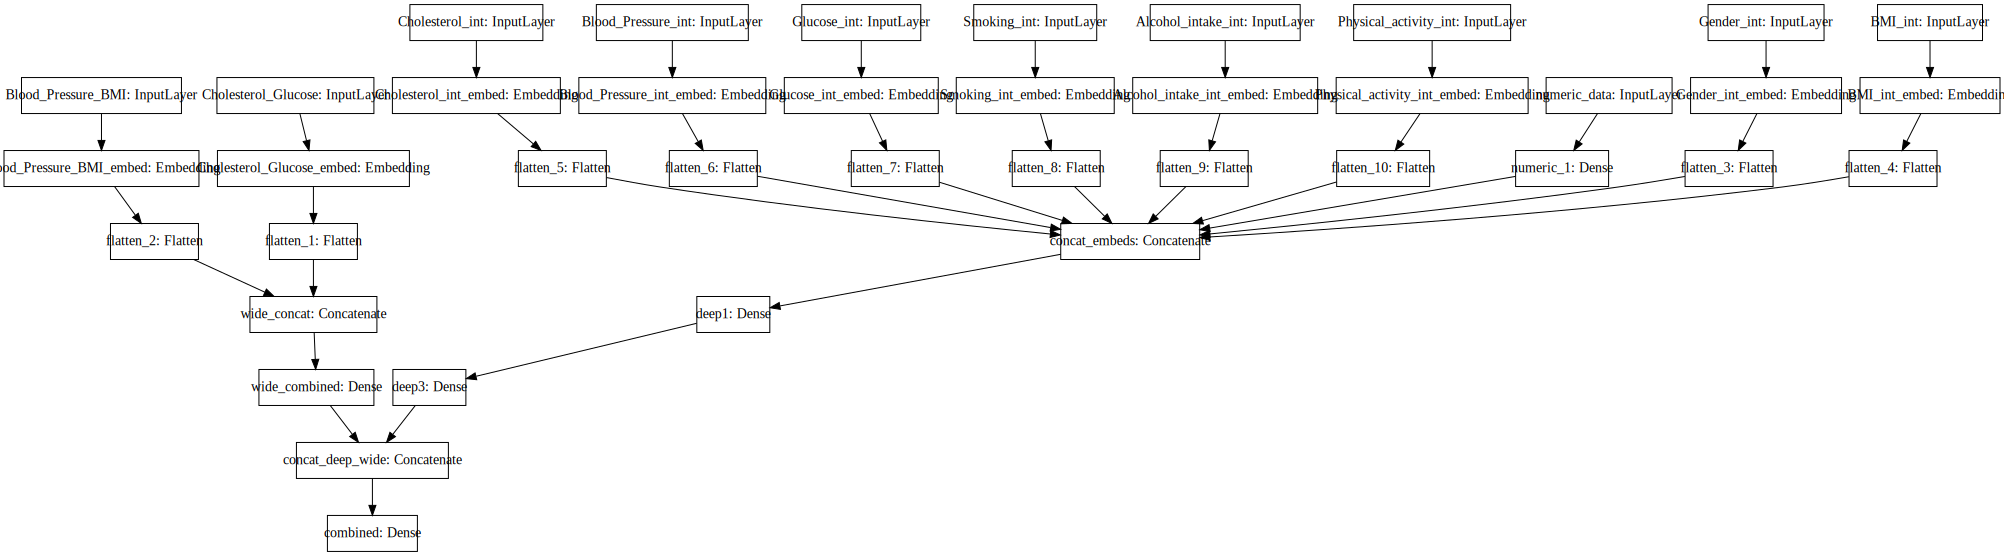

In [29]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
import pydotplus as pyd

keras.utils.vis_utils.pydot = pyd

#Visualize Model

def visualize_model(model):
    return SVG(model_to_dot(model).create(prog='dot', format='svg'))

visualize_model(model_1_layer1)

# you will need to install pydot properly on your machine to get this running
#SVG(model_to_dot(model_1_layer1).create(prog='dot', format='svg'))

### Model 2 with 2 layers in deep branch

In [23]:
#'Gender','BMI','Cholesterol','Blood_Pressure','Glucose', 'Smoking','Alcohol_intake','Physical_activity','Cardio_disease'


def wide_and_deep2_layer1(X_train,X_test,y_train,y_test,v=0,epo=1):
    X_train_num =  X_train[numeric_headers].values
    X_test_num = X_test[numeric_headers].values
    
    cross_columns = [['Cholesterol','Alcohol_intake'],
                     ['Smoking','Blood_Pressure'],
                     ['BMI','Glucose'],
                     ['Glucose','Physical_activity']]

    # we need to create separate lists for each branch
    embed_branches = []
    X_ints_train = []
    X_ints_test = []
    all_inputs = []
    all_wide_branch_outputs = []

    for cols in cross_columns:
        # encode crossed columns as ints for the embedding
        enc = LabelEncoder()

        # create crossed labels
        X_crossed_train = X_train[cols].apply(lambda x: '_'.join(str(x)), axis=1, raw = True)
        X_crossed_test = X_test[cols].apply(lambda x: '_'.join(str(x)), axis=1, raw = True)

        enc.fit(np.hstack((X_crossed_train.values,  X_crossed_test.values)))
        X_crossed_train = enc.transform(X_crossed_train)
        X_crossed_test = enc.transform(X_crossed_test)
        X_ints_train.append( X_crossed_train )
        X_ints_test.append( X_crossed_test )

        # get the number of categories
        N = max(X_ints_train[-1]+1) # same as the max(df_train[col])

        # create embedding branch from the number of categories
        inputs = Input(shape=(1,),dtype='int32', name = '_'.join(cols))
        all_inputs.append(inputs)
        x = Embedding(input_dim=N, 
                      output_dim=int(np.sqrt(N)), 
                      input_length=1, name = '_'.join(cols)+'_embed')(inputs)
        x = Flatten()(x)
        all_wide_branch_outputs.append(x)

    # merge the branches together
    wide_branch = concatenate(all_wide_branch_outputs, name='wide_concat')
    wide_branch = Dense(units=16,activation='relu',name='wide_combined')(wide_branch)

    # reset this input branch
    all_deep_branch_outputs = []
    # add in the embeddings
    for col in categorical_headers_ints:
        # encode as ints for the embedding
        X_ints_train.append( X_train[col].values )
        X_ints_test.append( X_test[col].values )

        # get the number of categories
        N = max(X_ints_train[-1]+1) # same as the max(df_train[col])

        # create embedding branch from the number of categories
        inputs = Input(shape=(1,),dtype='int32', name=col)
        all_inputs.append(inputs)
        x = Embedding(input_dim=N, 
                      output_dim=int(np.sqrt(N)), 
                      input_length=1, name=col+'_embed')(inputs)
        x = Flatten()(x)
        all_deep_branch_outputs.append(x)

    # also get a dense branch of the numeric features
    all_inputs.append(Input(shape=(X_train_num.shape[1],),
                            sparse=False,
                            name='numeric_data'))

    x = Dense(units=20, activation='relu',name='numeric_1')(all_inputs[-1])
    all_deep_branch_outputs.append( x )

    # merge the deep branches together
    deep_branch = concatenate(all_deep_branch_outputs,name='concat_embeds')
    deep_branch = Dense(units=50,activation='relu', name='deep1')(deep_branch)
    deep_branch = Dense(units=10,activation='relu', name='deep3')(deep_branch)

    final_branch = concatenate([wide_branch, deep_branch],name='concat_deep_wide')
    final_branch = Dense(units=1,activation='sigmoid',name='combined')(final_branch)

    model = Model(inputs=all_inputs, outputs=final_branch)

    def recall_m(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

    def precision_m(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision
    
    def f1_m(y_true, y_pred):
        precision = precision_m(y_true, y_pred)
        recall = recall_m(y_true, y_pred)
        return 2*((precision*recall)/(precision+recall+K.epsilon()))
    
    model.compile(optimizer='Adam',
              loss='binary_crossentropy',
              metrics=['accuracy',f1_m])

    # lets also add the history variable to see how we are doing
    # and lets add a validation set to keep track of our progress
    history = model.fit(X_ints_train+ [X_train_num],
                        y_train, 
                        epochs=epo, 
                        batch_size=50, 
                        verbose=v, 
                        validation_data = (X_ints_test + [X_test_num], y_test))
    
    pred_proba = model.predict(X_ints_test + [X_test_num])
    #pred = np.round(np.argmax(model.predict(X_ints_test + [X_test_num]),axis=1))
    pred = np.round(pred_proba)
    print(pred,y_test)
    
    c = f1_score(y_test, pred)
    
    return history,model,c,pred

In [31]:
history_2_layer1,model_2_layer1,c_2_layer1,pred_2_layer1 = wide_and_deep2_layer1(X_train,X_test,y_train,y_test,1,25) # last two are verbose and epochs
model_2_layer1.summary()

Train on 56000 samples, validate on 14000 samples
Epoch 1/25
56000/56000 [==============================] - 10s 183us/step - loss: 0.5666 - acc: 0.7196 - f1_m: 0.7104 - val_loss: 0.5539 - val_acc: 0.7280 - val_f1_m: 0.7169
Epoch 2/25
56000/56000 [==============================] - 7s 119us/step - loss: 0.5482 - acc: 0.7332 - f1_m: 0.7227 - val_loss: 0.5545 - val_acc: 0.7275 - val_f1_m: 0.7159
Epoch 3/25
56000/56000 [==============================] - 7s 127us/step - loss: 0.5443 - acc: 0.7349 - f1_m: 0.7234 - val_loss: 0.5498 - val_acc: 0.7309 - val_f1_m: 0.7117
Epoch 4/25
56000/56000 [==============================] - 7s 126us/step - loss: 0.5424 - acc: 0.7339 - f1_m: 0.7209 - val_loss: 0.5481 - val_acc: 0.7310 - val_f1_m: 0.7180
Epoch 5/25
56000/56000 [==============================] - 7s 130us/step - loss: 0.5427 - acc: 0.7352 - f1_m: 0.7221 - val_loss: 0.5480 - val_acc: 0.7328 - val_f1_m: 0.7162
Epoch 6/25
56000/56000 [==============================] - 7s 128us/step - loss: 0.5413 - 

In [32]:
costs_wd2_layer1 = []
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=2)

ref = 1
for train_idx, test_idx in kfold.split(X_train, y_train):
    print ('Fold',ref,'in kfold ...')
    
    X_train_temp = X_train.iloc[train_idx]
    y_train_temp = y_train[train_idx]
    X_test_temp = X_train.iloc[test_idx]
    y_test_temp = y_train[test_idx]
    
    # take cost
    history,model,c,pred = wide_and_deep2_layer1(X_train_temp,X_test_temp,y_train_temp,y_test_temp,0,25) # last two are verbose and epochs
    costs_wd2_layer1.append(c)
    
    print(mt.confusion_matrix(y_test_temp,pred), "=>", c)
    ref+=1

print(costs_wd2_layer1)

Fold 1 in kfold ...
[[1.]
 [1.]
 [0.]
 ...
 [0.]
 [1.]
 [1.]] [1 1 0 ... 1 1 1]
[[2202  590]
 [ 905 1904]] => 0.7180841033377332
Fold 2 in kfold ...
[[0.]
 [1.]
 [1.]
 ...
 [0.]
 [1.]
 [1.]] [1 1 0 ... 0 1 0]
[[2179  613]
 [ 871 1938]] => 0.723134328358209
Fold 3 in kfold ...
[[1.]
 [0.]
 [0.]
 ...
 [0.]
 [1.]
 [0.]] [1 0 1 ... 0 1 0]
[[2101  691]
 [ 807 2002]] => 0.727735368956743
Fold 4 in kfold ...
[[0.]
 [0.]
 [1.]
 ...
 [1.]
 [0.]
 [1.]] [0 1 1 ... 0 1 0]
[[2108  684]
 [ 763 2046]] => 0.7387615092977072
Fold 5 in kfold ...
[[1.]
 [0.]
 [1.]
 ...
 [1.]
 [0.]
 [0.]] [1 0 0 ... 1 0 0]
[[2245  547]
 [ 946 1863]] => 0.7139298716229161
Fold 6 in kfold ...
[[1.]
 [0.]
 [1.]
 ...
 [0.]
 [1.]
 [0.]] [1 0 1 ... 0 1 0]
[[2131  660]
 [ 773 2035]] => 0.7395965836816282
Fold 7 in kfold ...
[[0.]
 [0.]
 [0.]
 ...
 [1.]
 [1.]
 [1.]] [1 0 0 ... 1 0 1]
[[2192  599]
 [ 904 1904]] => 0.7170024477499528
Fold 8 in kfold ...
[[0.]
 [0.]
 [1.]
 ...
 [1.]
 [1.]
 [0.]] [1 0 1 ... 1 1 0]
[[2096  695]
 [ 803

In [33]:
c2_layer1_avg = np.mean(costs_wd2_layer1)
print(c2_layer1_avg)
f1_costs.append(c2_layer1_avg)

0.7259732173378513


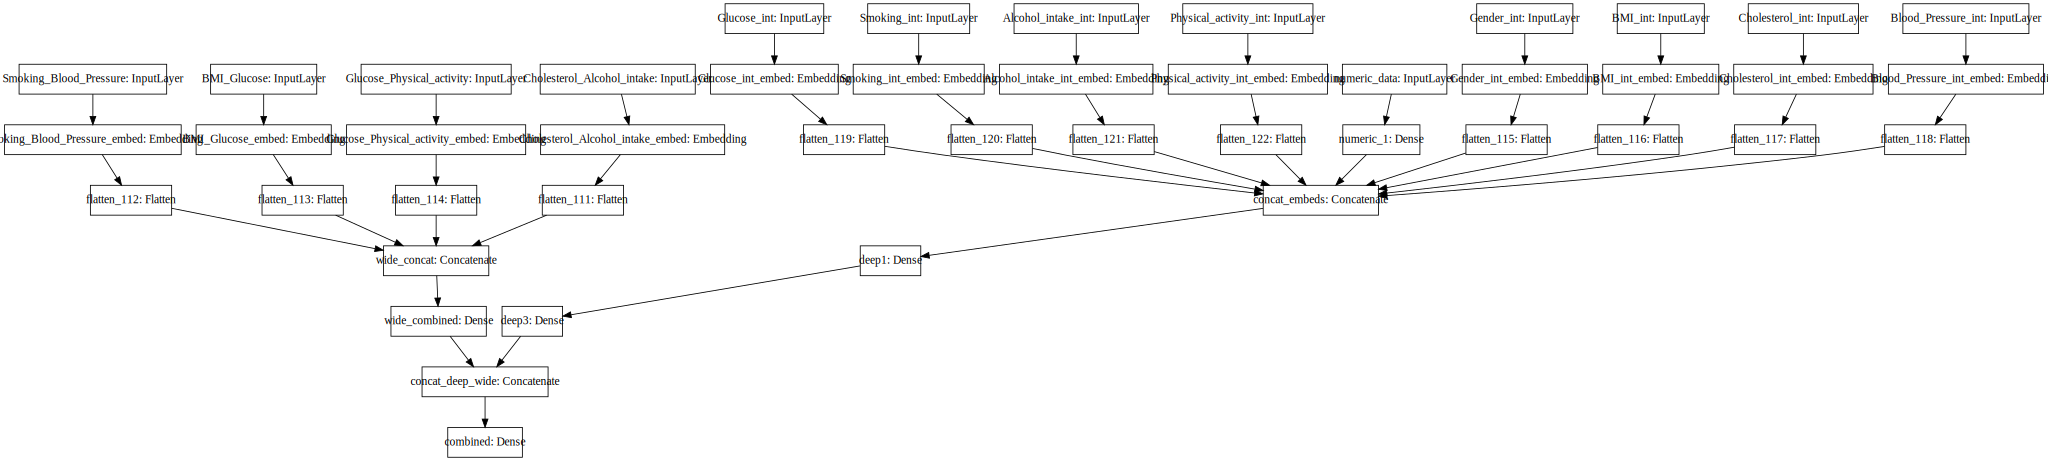

In [34]:
SVG(model_to_dot(model_2_layer1).create(prog='dot', format='svg'))

### Model 3 with 2 layers in deep branch

In [35]:
#'Gender','BMI','Cholesterol','Blood_Pressure','Glucose', 'Smoking','Alcohol_intake','Physical_activity','Cardio_disease'

def wide_and_deep3_layer1(X_train,X_test,y_train,y_test,v=0,epo=1):
    X_train_num =  X_train[numeric_headers].values
    X_test_num = X_test[numeric_headers].values
    
    cross_columns = [['Cholesterol','Alcohol_intake','Glucose'],
                     ['Smoking','Alcohol_intake'],
                     ['BMI','Physical_activity']]

    # we need to create separate lists for each branch
    embed_branches = []
    X_ints_train = []
    X_ints_test = []
    all_inputs = []
    all_wide_branch_outputs = []

    for cols in cross_columns:
        # encode crossed columns as ints for the embedding
        enc = LabelEncoder()

        # create crossed labels
        X_crossed_train = X_train[cols].apply(lambda x: '_'.join(str(x)), axis=1, raw = True)
        X_crossed_test = X_test[cols].apply(lambda x: '_'.join(str(x)), axis=1, raw = True)

        enc.fit(np.hstack((X_crossed_train.values,  X_crossed_test.values)))
        X_crossed_train = enc.transform(X_crossed_train)
        X_crossed_test = enc.transform(X_crossed_test)
        X_ints_train.append( X_crossed_train )
        X_ints_test.append( X_crossed_test )

        # get the number of categories
        N = max(X_ints_train[-1]+1) # same as the max(df_train[col])

        # create embedding branch from the number of categories
        inputs = Input(shape=(1,),dtype='int32', name = '_'.join(cols))
        all_inputs.append(inputs)
        x = Embedding(input_dim=N, 
                      output_dim=int(np.sqrt(N)), 
                      input_length=1, name = '_'.join(cols)+'_embed')(inputs)
        x = Flatten()(x)
        all_wide_branch_outputs.append(x)

    # merge the branches together
    wide_branch = concatenate(all_wide_branch_outputs, name='wide_concat')
    wide_branch = Dense(units=16,activation='relu',name='wide_combined')(wide_branch)

    # reset this input branch
    all_deep_branch_outputs = []
    # add in the embeddings
    for col in categorical_headers_ints:
        # encode as ints for the embedding
        X_ints_train.append( X_train[col].values )
        X_ints_test.append( X_test[col].values )

        # get the number of categories
        N = max(X_ints_train[-1]+1) # same as the max(df_train[col])

        # create embedding branch from the number of categories
        inputs = Input(shape=(1,),dtype='int32', name=col)
        all_inputs.append(inputs)
        x = Embedding(input_dim=N, 
                      output_dim=int(np.sqrt(N)), 
                      input_length=1, name=col+'_embed')(inputs)
        x = Flatten()(x)
        all_deep_branch_outputs.append(x)

    # also get a dense branch of the numeric features
    all_inputs.append(Input(shape=(X_train_num.shape[1],),
                            sparse=False,
                            name='numeric_data'))

    x = Dense(units=20, activation='relu',name='numeric_1')(all_inputs[-1])
    all_deep_branch_outputs.append( x )

    # merge the deep branches together
    deep_branch = concatenate(all_deep_branch_outputs,name='concat_embeds')
    deep_branch = Dense(units=50,activation='relu', name='deep1')(deep_branch)
    deep_branch = Dense(units=10,activation='relu', name='deep3')(deep_branch)

    final_branch = concatenate([wide_branch, deep_branch],name='concat_deep_wide')
    final_branch = Dense(units=1,activation='sigmoid',name='combined')(final_branch)

    model = Model(inputs=all_inputs, outputs=final_branch)

    def recall_m(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

    def precision_m(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision
    
    def f1_m(y_true, y_pred):
        precision = precision_m(y_true, y_pred)
        recall = recall_m(y_true, y_pred)
        return 2*((precision*recall)/(precision+recall+K.epsilon()))
    
    model.compile(optimizer='Adam',
              loss='binary_crossentropy',
              metrics=['accuracy',f1_m])

    # lets also add the history variable to see how we are doing
    # and lets add a validation set to keep track of our progress
    history = model.fit(X_ints_train+ [X_train_num],
                        y_train, 
                        epochs=epo, 
                        batch_size=50, 
                        verbose=v, 
                        validation_data = (X_ints_test + [X_test_num], y_test))
    
    pred_proba = model.predict(X_ints_test + [X_test_num])
    #pred = np.round(np.argmax(model.predict(X_ints_test + [X_test_num]),axis=1))
    pred = np.round(pred_proba)
    print(pred,y_test)
    
    c = f1_score(y_test, pred)
    
    return history,model,c,pred

In [36]:
history_3_layer1,model_3_layer1,c_3_layer1,pred_3_layer1 = wide_and_deep3_layer1(X_train,X_test,y_train,y_test,1,25) # last two are verbose and epochs
model_3_layer1.summary()

Train on 56000 samples, validate on 14000 samples
Epoch 1/25
56000/56000 [==============================] - 7s 121us/step - loss: 0.5665 - acc: 0.7187 - f1_m: 0.7050 - val_loss: 0.5552 - val_acc: 0.7306 - val_f1_m: 0.7259
Epoch 2/25
56000/56000 [==============================] - 6s 102us/step - loss: 0.5494 - acc: 0.7319 - f1_m: 0.7189 - val_loss: 0.5489 - val_acc: 0.7339 - val_f1_m: 0.7134
Epoch 3/25
56000/56000 [==============================] - 6s 100us/step - loss: 0.5462 - acc: 0.7336 - f1_m: 0.7188 - val_loss: 0.5432 - val_acc: 0.7334 - val_f1_m: 0.7233
Epoch 4/25
56000/56000 [==============================] - 6s 100us/step - loss: 0.5442 - acc: 0.7335 - f1_m: 0.7177 - val_loss: 0.5419 - val_acc: 0.7331 - val_f1_m: 0.7172
Epoch 5/25
56000/56000 [==============================] - 6s 99us/step - loss: 0.5430 - acc: 0.7354 - f1_m: 0.7185 - val_loss: 0.5409 - val_acc: 0.7327 - val_f1_m: 0.7117
Epoch 6/25
56000/56000 [==============================] - 6s 104us/step - loss: 0.5428 - ac

In [37]:
costs_wd3_layer1 = []
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=2)

ref = 1
for train_idx, test_idx in kfold.split(X_train, y_train):
    print ('Fold',ref,'in kfold ...')
 
    X_train_temp = X_train.iloc[train_idx]
    y_train_temp = y_train[train_idx]
    X_test_temp = X_train.iloc[test_idx]
    y_test_temp = y_train[test_idx]

    # take cost
    history,model,c,pred = wide_and_deep3_layer1(X_train_temp,X_test_temp,y_train_temp,y_test_temp,0,25) # last two are verbose and epochs
    costs_wd3_layer1.append(c)
 
    print(mt.confusion_matrix(y_test_temp,pred), "=>", c)
    ref+=1

print(costs_wd3_layer1)

Fold 1 in kfold ...
[[1.]
 [1.]
 [0.]
 ...
 [0.]
 [1.]
 [1.]] [1 1 0 ... 1 1 1]
[[2224  568]
 [ 920 1889]] => 0.7174325864033422
Fold 2 in kfold ...
[[0.]
 [1.]
 [1.]
 ...
 [0.]
 [1.]
 [1.]] [1 1 0 ... 0 1 0]
[[2117  675]
 [ 807 2002]] => 0.7298578199052133
Fold 3 in kfold ...
[[1.]
 [0.]
 [0.]
 ...
 [0.]
 [1.]
 [0.]] [1 0 1 ... 0 1 0]
[[2088  704]
 [ 786 2023]] => 0.7308526011560694
Fold 4 in kfold ...
[[0.]
 [0.]
 [1.]
 ...
 [1.]
 [0.]
 [1.]] [0 1 1 ... 0 1 0]
[[2114  678]
 [ 772 2037]] => 0.7375090514120203
Fold 5 in kfold ...
[[1.]
 [0.]
 [1.]
 ...
 [1.]
 [0.]
 [0.]] [1 0 0 ... 1 0 0]
[[2100  692]
 [ 784 2025]] => 0.7328990228013029
Fold 6 in kfold ...
[[1.]
 [0.]
 [1.]
 ...
 [0.]
 [1.]
 [0.]] [1 0 1 ... 0 1 0]
[[2189  602]
 [ 851 1957]] => 0.7292714738215018
Fold 7 in kfold ...
[[0.]
 [0.]
 [0.]
 ...
 [1.]
 [1.]
 [1.]] [1 0 0 ... 1 0 1]
[[2041  750]
 [ 767 2041]] => 0.7290587604929452
Fold 8 in kfold ...
[[0.]
 [0.]
 [1.]
 ...
 [1.]
 [1.]
 [0.]] [1 0 1 ... 1 1 0]
[[2243  548]
 [ 9

In [38]:
c3_layer1_avg = np.mean(costs_wd3_layer1)
print(c3_layer1_avg)
f1_costs.append(c3_layer1_avg)

0.7268397925357709


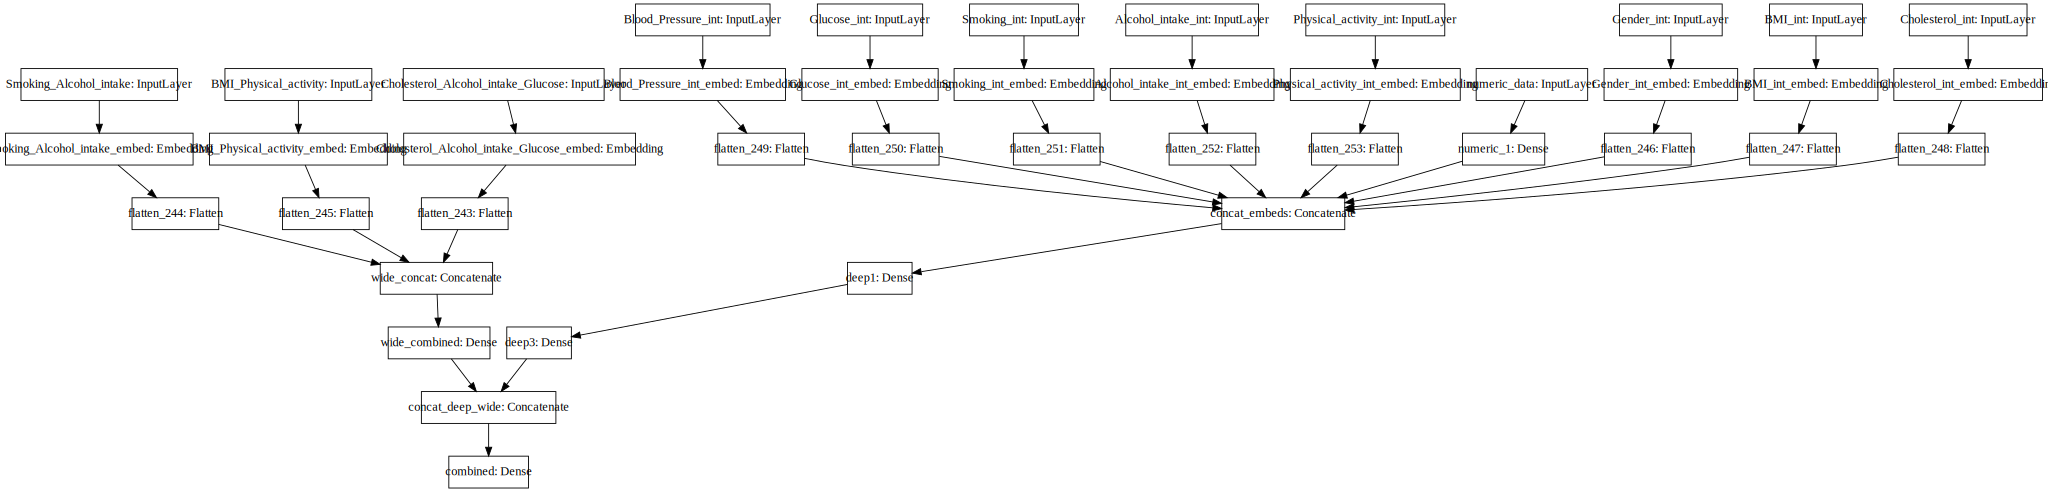

In [39]:
SVG(model_to_dot(model_3_layer1).create(prog='dot', format='svg'))

Text(0.5, 0, 'epochs')

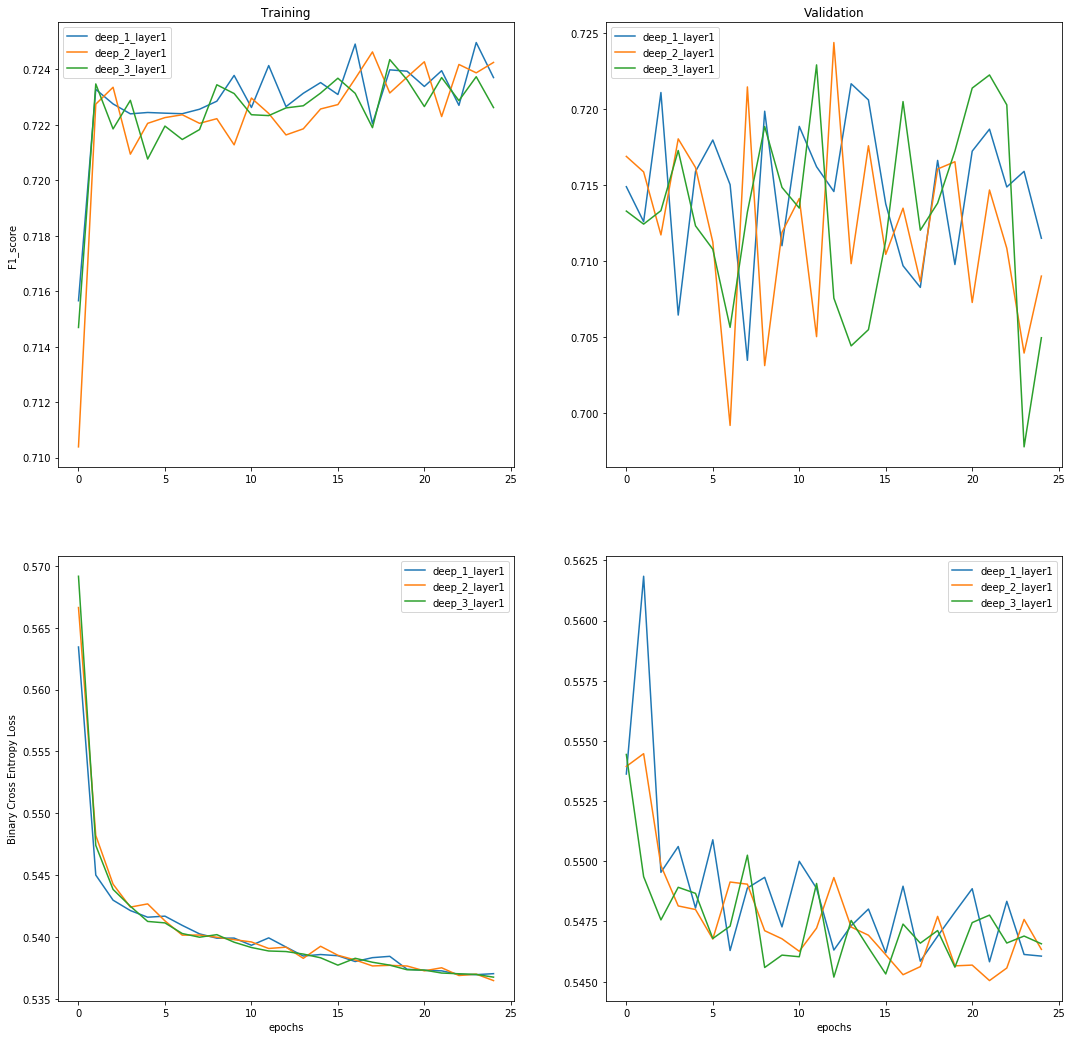

In [40]:
from matplotlib import pyplot as plt

%matplotlib inline
legends=['deep_1_layer1','deep_2_layer1','deep_3_layer1']

plt.figure(figsize=(18,18))
plt.subplot(2,2,1)
plt.plot(history_1_layer1.history['f1_m'])
plt.plot(history_2_layer1.history['f1_m'])
plt.plot(history_3_layer1.history['f1_m'])
plt.legend(legends)
plt.ylabel('F1_score')
plt.title('Training')

plt.subplot(2,2,2)
plt.plot(history_1_layer1.history['val_f1_m'])
plt.plot(history_2_layer1.history['val_f1_m'])
plt.plot(history_3_layer1.history['val_f1_m'])
plt.legend(legends)
plt.title('Validation')

plt.subplot(2,2,3)
plt.plot(history_1_layer1.history['loss'])
plt.plot(history_2_layer1.history['loss'])
plt.plot(history_3_layer1.history['loss'])
plt.ylabel('Binary Cross Entropy Loss')
plt.legend(legends)
plt.xlabel('epochs')

plt.subplot(2,2,4)
plt.plot(history_1_layer1.history['val_loss'])
plt.plot(history_2_layer1.history['val_loss'])
plt.plot(history_3_layer1.history['val_loss'])
plt.legend(legends)
plt.xlabel('epochs')

We have created 3 different wide and deep network models with each network having 2 layers in the deep branch and visualized their performance above. The plots show f1 scores and binary cross entropy loss for all the three models vs training iterations.<br>
We are training for 25 epochs only, as the validation loss started increasing after around 25 epochs.

### Model 1 with 3 layers in deep branch

In [25]:
#'Gender','BMI','Cholesterol','Blood_Pressure','Glucose', 'Smoking','Alcohol_intake','Physical_activity','Cardio_disease'

def wide_and_deep1_layer2(X_train,X_test,y_train,y_test,v=0,epo=1):
    X_train_num =  X_train[numeric_headers].values
    X_test_num = X_test[numeric_headers].values
    
    cross_columns = [["Cholesterol","Glucose"],
                     ["Smoking","Alcohol_intake"]]


    # we need to create separate lists for each branch
    embed_branches = []
    X_ints_train = []
    X_ints_test = []
    all_inputs = []
    all_wide_branch_outputs = []

    for cols in cross_columns:
        # encode crossed columns as ints for the embedding
        enc = LabelEncoder()

        # create crossed labels
        X_crossed_train = X_train[cols].apply(lambda x: '_'.join(str(x)), axis=1, raw = True)
        X_crossed_test = X_test[cols].apply(lambda x: '_'.join(str(x)), axis=1, raw = True)

        enc.fit(np.hstack((X_crossed_train.values,  X_crossed_test.values)))
        X_crossed_train = enc.transform(X_crossed_train)
        X_crossed_test = enc.transform(X_crossed_test)
        X_ints_train.append( X_crossed_train )
        X_ints_test.append( X_crossed_test )

        # get the number of categories
        N = max(X_ints_train[-1]+1) # same as the max(df_train[col])

        # create embedding branch from the number of categories
        inputs = Input(shape=(1,),dtype='int32', name = '_'.join(cols))
        all_inputs.append(inputs)
        x = Embedding(input_dim=N, 
                      output_dim=int(np.sqrt(N)), 
                      input_length=1, name = '_'.join(cols)+'_embed')(inputs)
        x = Flatten()(x)
        all_wide_branch_outputs.append(x)

    # merge the branches together
    wide_branch = concatenate(all_wide_branch_outputs, name='wide_concat')
    wide_branch = Dense(units=16,activation='relu',name='wide_combined')(wide_branch)

    # reset this input branch
    all_deep_branch_outputs = []
    # add in the embeddings
    for col in categorical_headers_ints:
        # encode as ints for the embedding
        X_ints_train.append( X_train[col].values )
        X_ints_test.append( X_test[col].values )

        # get the number of categories
        N = max(X_ints_train[-1]+1) # same as the max(df_train[col])

        # create embedding branch from the number of categories
        inputs = Input(shape=(1,),dtype='int32', name=col)
        all_inputs.append(inputs)
        x = Embedding(input_dim=N, 
                      output_dim=int(np.sqrt(N)), 
                      input_length=1, name=col+'_embed')(inputs)
        x = Flatten()(x)
        all_deep_branch_outputs.append(x)

    # also get a dense branch of the numeric features
    all_inputs.append(Input(shape=(X_train_num.shape[1],),
                            sparse=False,
                            name='numeric_data'))

    x = Dense(units=20, activation='relu',name='numeric_1')(all_inputs[-1])
    all_deep_branch_outputs.append( x )

    # merge the deep branches together
    deep_branch = concatenate(all_deep_branch_outputs,name='concat_embeds')
    deep_branch = Dense(units=50,activation='relu', name='deep1')(deep_branch)
    deep_branch = Dense(units=30,activation='relu', name='deep2')(deep_branch)
    deep_branch = Dense(units=10,activation='relu', name='deep3')(deep_branch)

    final_branch = concatenate([wide_branch, deep_branch],name='concat_deep_wide')
    final_branch = Dense(units=1,activation='sigmoid',name='combined')(final_branch)

    model = Model(inputs=all_inputs, outputs=final_branch)

    def recall_m(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

    def precision_m(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision
    
    def f1_m(y_true, y_pred):
        precision = precision_m(y_true, y_pred)
        recall = recall_m(y_true, y_pred)
        return 2*((precision*recall)/(precision+recall+K.epsilon()))
    
    model.compile(optimizer='Adam',
              loss='binary_crossentropy',
              metrics=['accuracy',f1_m])

    # lets also add the history variable to see how we are doing
    # and lets add a validation set to keep track of our progress
    history = model.fit(X_ints_train+ [X_train_num],
                        y_train, 
                        epochs=epo, 
                        batch_size=50, 
                        verbose=v, 
                        validation_data = (X_ints_test + [X_test_num], y_test))
    
    pred_proba = model.predict(X_ints_test + [X_test_num])
    #pred = np.round(np.argmax(model.predict(X_ints_test + [X_test_num]),axis=1))
    pred = np.round(pred_proba)
    print(pred,y_test)
    
    c = f1_score(y_test, pred)
    
    return history,model,c,pred

In [42]:
history_1_layer2,model_1_layer2,c_1_layer2,pred_1_layer2 = wide_and_deep1_layer2(X_train,X_test,y_train,y_test,1,25) # last two are verbose and epochs
model_1_layer2.summary()

Train on 56000 samples, validate on 14000 samples
Epoch 1/25
56000/56000 [==============================] - 18s 329us/step - loss: 0.5667 - acc: 0.7198 - f1_m: 0.7099 - val_loss: 0.5531 - val_acc: 0.7294 - val_f1_m: 0.7121
Epoch 2/25
56000/56000 [==============================] - 10s 184us/step - loss: 0.5463 - acc: 0.7344 - f1_m: 0.7226 - val_loss: 0.5519 - val_acc: 0.7296 - val_f1_m: 0.6920
Epoch 3/25
56000/56000 [==============================] - 10s 184us/step - loss: 0.5433 - acc: 0.7336 - f1_m: 0.7194 - val_loss: 0.5485 - val_acc: 0.7306 - val_f1_m: 0.7178
Epoch 4/25
56000/56000 [==============================] - 10s 184us/step - loss: 0.5419 - acc: 0.7346 - f1_m: 0.7200 - val_loss: 0.5461 - val_acc: 0.7317 - val_f1_m: 0.7156
Epoch 5/25
56000/56000 [==============================] - 10s 184us/step - loss: 0.5414 - acc: 0.7347 - f1_m: 0.7208 - val_loss: 0.5467 - val_acc: 0.7316 - val_f1_m: 0.7062
Epoch 6/25
56000/56000 [==============================] - 10s 183us/step - loss: 0.54

In [43]:
print(c_1_layer2)

0.7155165840640486


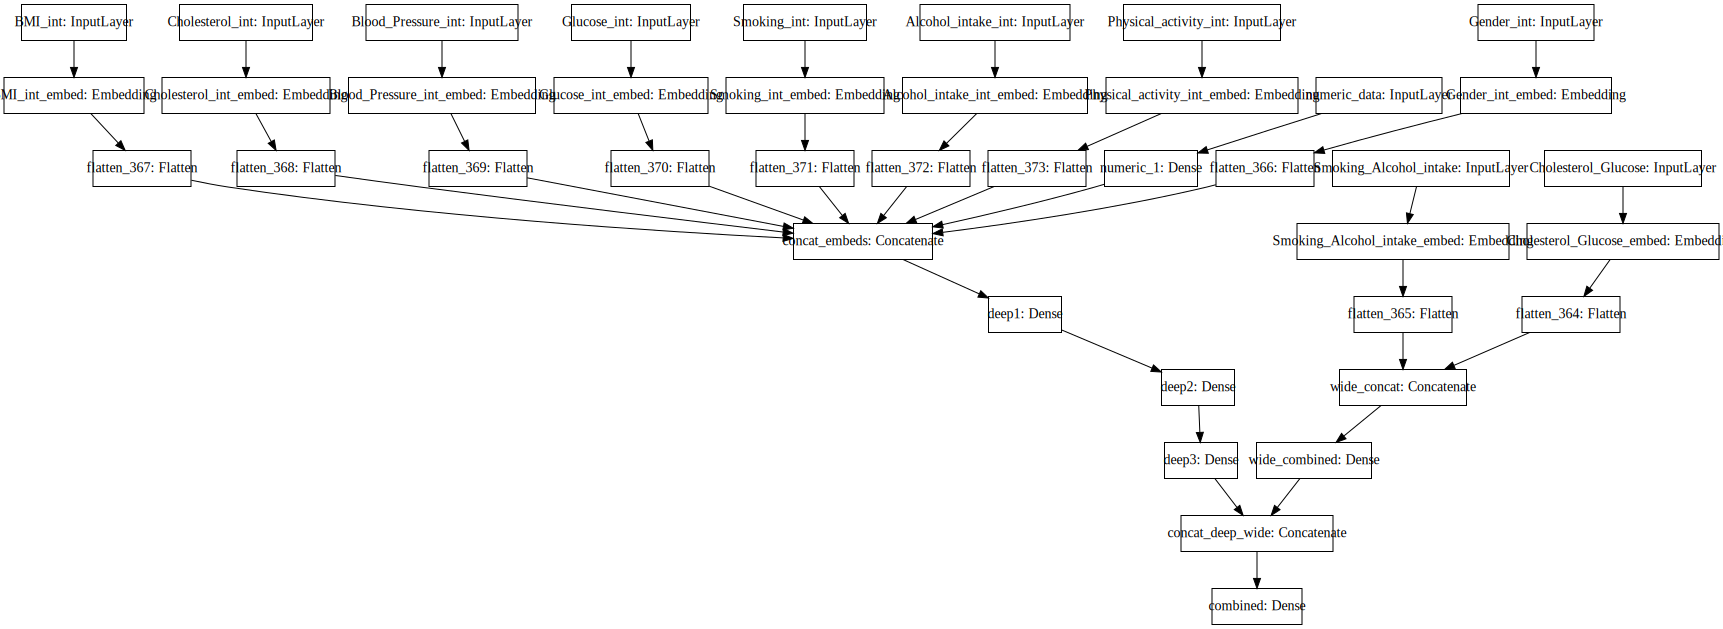

In [44]:
SVG(model_to_dot(model_1_layer2).create(prog='dot', format='svg'))

In [45]:
costs_wd1_layer2 = []
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=2)

ref = 1
for train_idx, test_idx in kfold.split(X_train, y_train):
    print ('Fold',ref,'in kfold ...')
    
    X_train_temp = X_train.iloc[train_idx]
    y_train_temp = y_train[train_idx]
    X_test_temp = X_train.iloc[test_idx]
    y_test_temp = y_train[test_idx]
    
    # take cost
    history,model,c,pred = wide_and_deep1_layer2(X_train_temp,X_test_temp,y_train_temp,y_test_temp,0,25) # last two are verbose and epochs
    costs_wd1_layer2.append(c)
 
    print(mt.confusion_matrix(y_test_temp,pred), "=>", c)
    ref+=1

print(costs_wd1_layer2)

Fold 1 in kfold ...
[[1.]
 [1.]
 [0.]
 ...
 [1.]
 [1.]
 [1.]] [1 1 0 ... 1 1 1]
[[1934  858]
 [ 689 2120]] => 0.7326766891308105
Fold 2 in kfold ...
[[0.]
 [1.]
 [1.]
 ...
 [0.]
 [1.]
 [1.]] [1 1 0 ... 0 1 0]
[[2212  580]
 [ 864 1945]] => 0.72928383952006
Fold 3 in kfold ...
[[1.]
 [0.]
 [0.]
 ...
 [0.]
 [1.]
 [0.]] [1 0 1 ... 0 1 0]
[[2095  697]
 [ 790 2019]] => 0.7308597285067873
Fold 4 in kfold ...
[[0.]
 [0.]
 [1.]
 ...
 [1.]
 [0.]
 [1.]] [0 1 1 ... 0 1 0]
[[2190  602]
 [ 836 1973]] => 0.7329123328380386
Fold 5 in kfold ...
[[1.]
 [0.]
 [1.]
 ...
 [1.]
 [0.]
 [0.]] [1 0 0 ... 1 0 0]
[[2102  690]
 [ 781 2028]] => 0.7338519992762801
Fold 6 in kfold ...
[[1.]
 [0.]
 [1.]
 ...
 [0.]
 [0.]
 [0.]] [1 0 1 ... 0 1 0]
[[2152  639]
 [ 823 1985]] => 0.7308541973490428
Fold 7 in kfold ...
[[0.]
 [0.]
 [0.]
 ...
 [1.]
 [1.]
 [1.]] [1 0 0 ... 1 0 1]
[[2229  562]
 [ 945 1863]] => 0.712019873877317
Fold 8 in kfold ...
[[0.]
 [0.]
 [1.]
 ...
 [1.]
 [1.]
 [0.]] [1 0 1 ... 1 1 0]
[[2260  531]
 [ 988 

In [46]:
c1_layer2_avg = np.mean(costs_wd1_layer2)
print(c1_layer2_avg)
f1_costs.append(c1_layer2_avg)

0.7262257003278829


### Model 2 with 3 layers in deep branch

In [26]:
#'Gender','BMI','Cholesterol','Blood_Pressure','Glucose', 'Smoking','Alcohol_intake','Physical_activity','Cardio_disease'

def wide_and_deep2_layer2(X_train,X_test,y_train,y_test,v=0,epo=1):
    X_train_num =  X_train[numeric_headers].values
    X_test_num = X_test[numeric_headers].values
    
    cross_columns = [["Cholesterol","Alcohol_intake"],
                     ["BMI","Blood_Pressure"],
                     ["Cholesterol","Glucose"],
                     ["Glucose","Physical_activity"]]

    # we need to create separate lists for each branch
    embed_branches = []
    X_ints_train = []
    X_ints_test = []
    all_inputs = []
    all_wide_branch_outputs = []

    for cols in cross_columns:
        # encode crossed columns as ints for the embedding
        enc = LabelEncoder()

        # create crossed labels
        X_crossed_train = X_train[cols].apply(lambda x: '_'.join(str(x)), axis=1, raw = True)
        X_crossed_test = X_test[cols].apply(lambda x: '_'.join(str(x)), axis=1, raw = True)

        enc.fit(np.hstack((X_crossed_train.values,  X_crossed_test.values)))
        X_crossed_train = enc.transform(X_crossed_train)
        X_crossed_test = enc.transform(X_crossed_test)
        X_ints_train.append( X_crossed_train )
        X_ints_test.append( X_crossed_test )

        # get the number of categories
        N = max(X_ints_train[-1]+1) # same as the max(df_train[col])

        # create embedding branch from the number of categories
        inputs = Input(shape=(1,),dtype='int32', name = '_'.join(cols))
        all_inputs.append(inputs)
        x = Embedding(input_dim=N, 
                      output_dim=int(np.sqrt(N)), 
                      input_length=1, name = '_'.join(cols)+'_embed')(inputs)
        x = Flatten()(x)
        all_wide_branch_outputs.append(x)

    # merge the branches together
    wide_branch = concatenate(all_wide_branch_outputs, name='wide_concat')
    wide_branch = Dense(units=16,activation='relu',name='wide_combined')(wide_branch)

    # reset this input branch
    all_deep_branch_outputs = []
    # add in the embeddings
    for col in categorical_headers_ints:
        # encode as ints for the embedding
        X_ints_train.append( X_train[col].values )
        X_ints_test.append( X_test[col].values )

        # get the number of categories
        N = max(X_ints_train[-1]+1) # same as the max(df_train[col])

        # create embedding branch from the number of categories
        inputs = Input(shape=(1,),dtype='int32', name=col)
        all_inputs.append(inputs)
        x = Embedding(input_dim=N, 
                      output_dim=int(np.sqrt(N)), 
                      input_length=1, name=col+'_embed')(inputs)
        x = Flatten()(x)
        all_deep_branch_outputs.append(x)

    # also get a dense branch of the numeric features
    all_inputs.append(Input(shape=(X_train_num.shape[1],),
                            sparse=False,
                            name='numeric_data'))

    x = Dense(units=20, activation='relu',name='numeric_1')(all_inputs[-1])
    all_deep_branch_outputs.append( x )

    # merge the deep branches together
    deep_branch = concatenate(all_deep_branch_outputs,name='concat_embeds')
    deep_branch = Dense(units=50,activation='relu', name='deep1')(deep_branch)
    deep_branch = Dense(units=30,activation='relu', name='deep2')(deep_branch)
    deep_branch = Dense(units=10,activation='relu', name='deep3')(deep_branch)

    final_branch = concatenate([wide_branch, deep_branch],name='concat_deep_wide')
    final_branch = Dense(units=1,activation='sigmoid',name='combined')(final_branch)

    model = Model(inputs=all_inputs, outputs=final_branch)

    def recall_m(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

    def precision_m(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision
    
    def f1_m(y_true, y_pred):
        precision = precision_m(y_true, y_pred)
        recall = recall_m(y_true, y_pred)
        return 2*((precision*recall)/(precision+recall+K.epsilon()))
    
    model.compile(optimizer='Adam',
              loss='mean_squared_error',
              metrics=['accuracy',f1_m])

    # lets also add the history variable to see how we are doing
    # and lets add a validation set to keep track of our progress
    history = model.fit(X_ints_train+ [X_train_num],
                        y_train, 
                        epochs=epo, 
                        batch_size=50, 
                        verbose=v, 
                        validation_data = (X_ints_test + [X_test_num], y_test))
    
    pred_proba = model.predict(X_ints_test + [X_test_num])
    #pred = np.round(np.argmax(model.predict(X_ints_test + [X_test_num]),axis=1))
    pred = np.round(pred_proba)
    print(pred,y_test)
    
    c = f1_score(y_test, pred)
    
    return history,model,c,pred

In [48]:
history_2_layer2,model_2_layer2,c_2_layer2,pred_2_layer2 = wide_and_deep2_layer2(X_train,X_test,y_train,y_test,1,25) # last two are verbose and epochs
model_2_layer2.summary()

Train on 56000 samples, validate on 14000 samples
Epoch 1/25
56000/56000 [==============================] - 22s 399us/step - loss: 0.1897 - acc: 0.7195 - f1_m: 0.7050 - val_loss: 0.1849 - val_acc: 0.7274 - val_f1_m: 0.7191
Epoch 2/25
56000/56000 [==============================] - 12s 217us/step - loss: 0.1820 - acc: 0.7332 - f1_m: 0.7215 - val_loss: 0.1831 - val_acc: 0.7319 - val_f1_m: 0.7153
Epoch 3/25
56000/56000 [==============================] - 12s 218us/step - loss: 0.1811 - acc: 0.7350 - f1_m: 0.7212 - val_loss: 0.1841 - val_acc: 0.7303 - val_f1_m: 0.7230
Epoch 4/25
56000/56000 [==============================] - 12s 219us/step - loss: 0.1806 - acc: 0.7359 - f1_m: 0.7227 - val_loss: 0.1829 - val_acc: 0.7319 - val_f1_m: 0.7183
Epoch 5/25
56000/56000 [==============================] - 12s 217us/step - loss: 0.1803 - acc: 0.7357 - f1_m: 0.7226 - val_loss: 0.1828 - val_acc: 0.7318 - val_f1_m: 0.7121
Epoch 6/25
56000/56000 [==============================] - 12s 223us/step - loss: 0.18

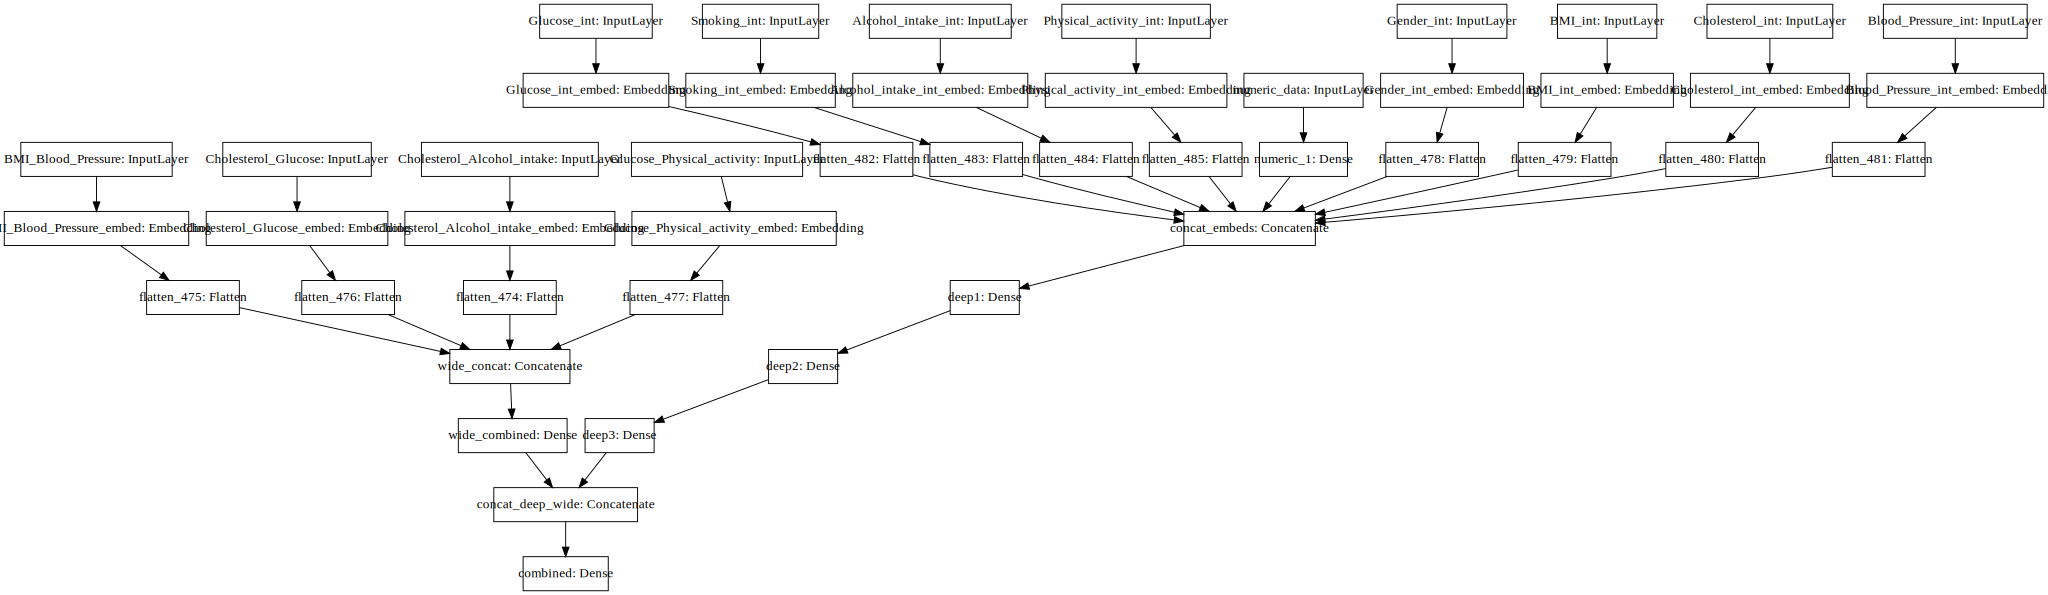

In [49]:
SVG(model_to_dot(model_2_layer2).create(prog='dot', format='svg'))

In [50]:
from sklearn.model_selection import StratifiedKFold
costs_wd2_layer2 = []
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=2)
ref = 1

for train_idx, test_idx in kfold.split(X_train, y_train):
    print ('Fold',ref,'in kfold ...')
    
    X_train_temp = X_train.iloc[train_idx]
    y_train_temp = y_train[train_idx]
    X_test_temp = X_train.iloc[test_idx]
    y_test_temp = y_train[test_idx]
    
    # take cost
    history,model,c,pred = wide_and_deep2_layer2(X_train_temp,X_test_temp,y_train_temp,y_test_temp,0,25) # last two are verbose and epochs
    costs_wd2_layer2.append(c)
    
    print(mt.confusion_matrix(y_test_temp,pred), "=>", c)
    ref+=1

print(costs_wd2_layer2)

Fold 1 in kfold ...
[[1.]
 [1.]
 [0.]
 ...
 [0.]
 [1.]
 [1.]] [1 1 0 ... 1 1 1]
[[2218  574]
 [ 938 1871]] => 0.7122192615150362
Fold 2 in kfold ...
[[0.]
 [1.]
 [1.]
 ...
 [0.]
 [1.]
 [1.]] [1 1 0 ... 0 1 0]
[[2086  706]
 [ 777 2032]] => 0.732648278348657
Fold 3 in kfold ...
[[1.]
 [0.]
 [0.]
 ...
 [0.]
 [1.]
 [0.]] [1 0 1 ... 0 1 0]
[[2187  605]
 [ 878 1931]] => 0.7225444340505146
Fold 4 in kfold ...
[[0.]
 [0.]
 [1.]
 ...
 [1.]
 [0.]
 [1.]] [0 1 1 ... 0 1 0]
[[2123  669]
 [ 773 2036]] => 0.7384838592673195
Fold 5 in kfold ...
[[1.]
 [0.]
 [1.]
 ...
 [1.]
 [0.]
 [0.]] [1 0 0 ... 1 0 0]
[[2149  643]
 [ 843 1966]] => 0.7257290513104466
Fold 6 in kfold ...
[[1.]
 [0.]
 [1.]
 ...
 [0.]
 [0.]
 [0.]] [1 0 1 ... 0 1 0]
[[2237  554]
 [ 905 1903]] => 0.7228869895536562
Fold 7 in kfold ...
[[0.]
 [0.]
 [0.]
 ...
 [1.]
 [1.]
 [1.]] [1 0 0 ... 1 0 1]
[[2064  727]
 [ 790 2018]] => 0.7268143345939132
Fold 8 in kfold ...
[[1.]
 [0.]
 [1.]
 ...
 [1.]
 [1.]
 [0.]] [1 0 1 ... 1 1 0]
[[2164  627]
 [ 85

In [51]:
c2_layer2_avg = np.mean(costs_wd2_layer2)
print(c2_layer2_avg)
f1_costs.append(c2_layer2_avg)

0.7265124416663398


### Model 3 with 3 layers in the deep branch

In [27]:
#'Gender','BMI','Cholesterol','Blood_Pressure','Glucose', 'Smoking','Alcohol_intake','Physical_activity','Cardio_diseaseRisk_group'

def wide_and_deep3_layer2(X_train,X_test,y_train,y_test,v=0,epo=1):
    X_train_num =  X_train[numeric_headers].values
    X_test_num = X_test[numeric_headers].values
    
    cross_columns = [['BMI','Cholesterol','Blood_Pressure'],
                     ["Smoking","Alcohol_intake"],
                     ["Glucose","Physical_activity"]]


    # we need to create separate lists for each branch
    embed_branches = []
    X_ints_train = []
    X_ints_test = []
    all_inputs = []
    all_wide_branch_outputs = []

    for cols in cross_columns:
        # encode crossed columns as ints for the embedding
        enc = LabelEncoder()

        # create crossed labels
        X_crossed_train = X_train[cols].apply(lambda x: '_'.join(str(x)), axis=1, raw = True)
        X_crossed_test = X_test[cols].apply(lambda x: '_'.join(str(x)), axis=1, raw = True)

        enc.fit(np.hstack((X_crossed_train.values,  X_crossed_test.values)))
        X_crossed_train = enc.transform(X_crossed_train)
        X_crossed_test = enc.transform(X_crossed_test)
        X_ints_train.append( X_crossed_train )
        X_ints_test.append( X_crossed_test )

        # get the number of categories
        N = max(X_ints_train[-1]+1) # same as the max(df_train[col])

        # create embedding branch from the number of categories
        inputs = Input(shape=(1,),dtype='int32', name = '_'.join(cols))
        all_inputs.append(inputs)
        x = Embedding(input_dim=N, 
                      output_dim=int(np.sqrt(N)), 
                      input_length=1, name = '_'.join(cols)+'_embed')(inputs)
        x = Flatten()(x)
        all_wide_branch_outputs.append(x)

    # merge the branches together
    wide_branch = concatenate(all_wide_branch_outputs, name='wide_concat')
    wide_branch = Dense(units=16,activation='relu',name='wide_combined')(wide_branch)

    # reset this input branch
    all_deep_branch_outputs = []
    # add in the embeddings
    for col in categorical_headers_ints:
        # encode as ints for the embedding
        X_ints_train.append( X_train[col].values )
        X_ints_test.append( X_test[col].values )

        # get the number of categories
        N = max(X_ints_train[-1]+1) # same as the max(df_train[col])

        # create embedding branch from the number of categories
        inputs = Input(shape=(1,),dtype='int32', name=col)
        all_inputs.append(inputs)
        x = Embedding(input_dim=N, 
                      output_dim=int(np.sqrt(N)), 
                      input_length=1, name=col+'_embed')(inputs)
        x = Flatten()(x)
        all_deep_branch_outputs.append(x)

    # also get a dense branch of the numeric features
    all_inputs.append(Input(shape=(X_train_num.shape[1],),
                            sparse=False,
                            name='numeric_data'))

    x = Dense(units=20, activation='relu',name='numeric_1')(all_inputs[-1])
    all_deep_branch_outputs.append( x )

    # merge the deep branches together
    deep_branch = concatenate(all_deep_branch_outputs,name='concat_embeds')
    deep_branch = Dense(units=50,activation='relu', name='deep1')(deep_branch)
    deep_branch = Dense(units=30,activation='relu', name='deep2')(deep_branch)
    deep_branch = Dense(units=10,activation='relu', name='deep3')(deep_branch)

    final_branch = concatenate([wide_branch, deep_branch],name='concat_deep_wide')
    final_branch = Dense(units=1,activation='sigmoid',name='combined')(final_branch)

    model = Model(inputs=all_inputs, outputs=final_branch)

    def recall_m(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

    def precision_m(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision
    
    def f1_m(y_true, y_pred):
        precision = precision_m(y_true, y_pred)
        recall = recall_m(y_true, y_pred)
        return 2*((precision*recall)/(precision+recall+K.epsilon()))
    
    model.compile(optimizer='Adam',
              loss='binary_crossentropy',
              metrics=['accuracy',f1_m])

    # lets also add the history variable to see how we are doing
    # and lets add a validation set to keep track of our progress
    history = model.fit(X_ints_train+ [X_train_num],
                        y_train, 
                        epochs=epo, 
                        batch_size=50, 
                        verbose=v, 
                        validation_data = (X_ints_test + [X_test_num], y_test))
    
    pred_proba = model.predict(X_ints_test + [X_test_num])
    #pred = np.round(np.argmax(model.predict(X_ints_test + [X_test_num]),axis=1))
    pred = np.round(pred_proba)
    print(pred,y_test)
    
    c = f1_score(y_test, pred)
    
    return history,model,c,pred

In [53]:
history_3_layer2,model_3_layer2,c_3_layer2,pred_3_layer2 = wide_and_deep3_layer2(X_train,X_test,y_train,y_test,1,25) # last two are verbose and epochs
model_3_layer2.summary()

Train on 56000 samples, validate on 14000 samples
Epoch 1/25
56000/56000 [==============================] - 28s 498us/step - loss: 0.5658 - acc: 0.7211 - f1_m: 0.7126 - val_loss: 0.5543 - val_acc: 0.7282 - val_f1_m: 0.7189
Epoch 2/25
56000/56000 [==============================] - 15s 268us/step - loss: 0.5478 - acc: 0.7334 - f1_m: 0.7239 - val_loss: 0.5525 - val_acc: 0.7283 - val_f1_m: 0.7066
Epoch 3/25
56000/56000 [==============================] - 15s 271us/step - loss: 0.5451 - acc: 0.7338 - f1_m: 0.7221 - val_loss: 0.5475 - val_acc: 0.7322 - val_f1_m: 0.7145
Epoch 4/25
56000/56000 [==============================] - 15s 268us/step - loss: 0.5436 - acc: 0.7346 - f1_m: 0.7210 - val_loss: 0.5485 - val_acc: 0.7351 - val_f1_m: 0.7130
Epoch 5/25
56000/56000 [==============================] - 15s 269us/step - loss: 0.5428 - acc: 0.7337 - f1_m: 0.7198 - val_loss: 0.5470 - val_acc: 0.7339 - val_f1_m: 0.7170
Epoch 6/25
56000/56000 [==============================] - 15s 268us/step - loss: 0.54

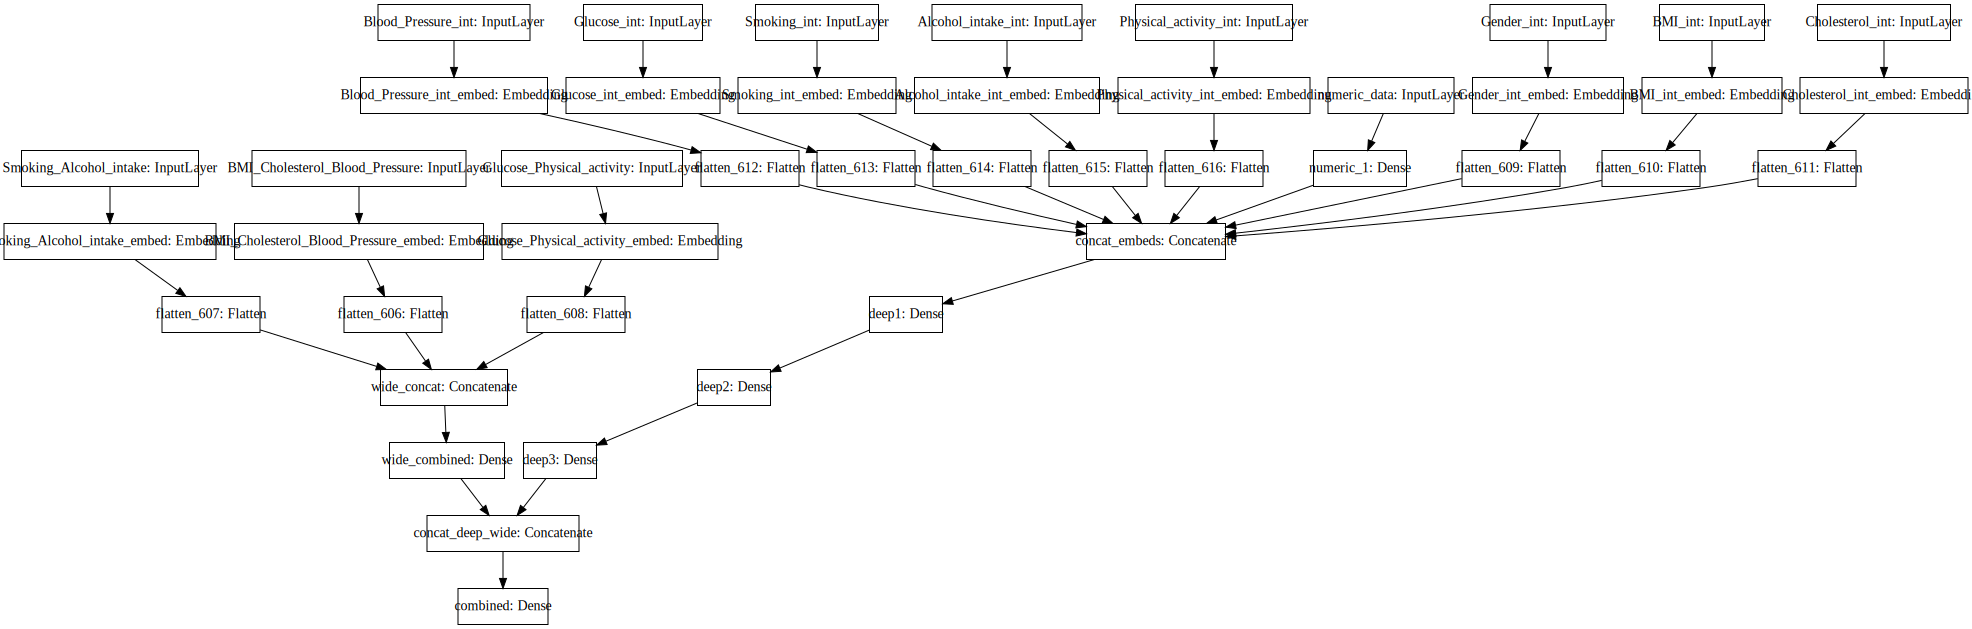

In [54]:
SVG(model_to_dot(model_3_layer2).create(prog='dot', format='svg'))

In [55]:
from sklearn.model_selection import StratifiedKFold
costs_wd3_layer2 = []
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=2)
ref = 1

for train_idx, test_idx in kfold.split(X_train, y_train):
    print ('Fold',ref,'in kfold ...')
    
    X_train_temp = X_train.iloc[train_idx]
    y_train_temp = y_train[train_idx]
    X_test_temp = X_train.iloc[test_idx]
    y_test_temp = y_train[test_idx]
    
    # take cost
    history,model,c,pred = wide_and_deep3_layer2(X_train_temp,X_test_temp,y_train_temp,y_test_temp,0,25) # last two are verbose and epochs
    costs_wd3_layer2.append(c)
    
    print(mt.confusion_matrix(y_test_temp,pred), "=>", c)
    ref+=1

print(costs_wd3_layer2)

Fold 1 in kfold ...
[[1.]
 [1.]
 [0.]
 ...
 [0.]
 [1.]
 [1.]] [1 1 0 ... 1 1 1]
[[2149  643]
 [ 851 1958]] => 0.7238447319778188
Fold 2 in kfold ...
[[0.]
 [1.]
 [1.]
 ...
 [0.]
 [1.]
 [1.]] [1 1 0 ... 0 1 0]
[[2176  616]
 [ 834 1975]] => 0.7314814814814815
Fold 3 in kfold ...
[[1.]
 [0.]
 [0.]
 ...
 [0.]
 [1.]
 [0.]] [1 0 1 ... 0 1 0]
[[2159  633]
 [ 862 1947]] => 0.7225830395249581
Fold 4 in kfold ...
[[0.]
 [0.]
 [1.]
 ...
 [1.]
 [0.]
 [1.]] [0 1 1 ... 0 1 0]
[[2156  636]
 [ 830 1979]] => 0.7297197640117994
Fold 5 in kfold ...
[[1.]
 [0.]
 [1.]
 ...
 [1.]
 [0.]
 [0.]] [1 0 0 ... 1 0 0]
[[2163  629]
 [ 859 1950]] => 0.7238307349665923
Fold 6 in kfold ...
[[1.]
 [0.]
 [1.]
 ...
 [0.]
 [0.]
 [0.]] [1 0 1 ... 0 1 0]
[[2299  492]
 [ 983 1825]] => 0.7121951219512195
Fold 7 in kfold ...
[[0.]
 [0.]
 [0.]
 ...
 [1.]
 [1.]
 [1.]] [1 0 0 ... 1 0 1]
[[2170  621]
 [ 859 1949]] => 0.7248047601338787
Fold 8 in kfold ...
[[0.]
 [0.]
 [1.]
 ...
 [1.]
 [1.]
 [0.]] [1 0 1 ... 1 1 0]
[[2082  709]
 [ 7

In [56]:
c3_layer2_avg = np.mean(costs_wd3_layer2)
print(c3_layer2_avg)
f1_costs.append(c3_layer2_avg)

0.7233407590746918


### Model 1 with 4 layers in deep branch

In [28]:
#'Gender','BMI','Cholesterol','Blood_Pressure','Glucose', 'Smoking','Alcohol_intake','Physical_activity','Cardio_disease'

def wide_and_deep1_layer3(X_train,X_test,y_train,y_test,v=0,epo=1):
    X_train_num =  X_train[numeric_headers].values
    X_test_num = X_test[numeric_headers].values
    
    cross_columns = [["Cholesterol","Glucose"],
                     ["Smoking","Alcohol_intake"]]


    # we need to create separate lists for each branch
    embed_branches = []
    X_ints_train = []
    X_ints_test = []
    all_inputs = []
    all_wide_branch_outputs = []

    for cols in cross_columns:
        # encode crossed columns as ints for the embedding
        enc = LabelEncoder()

        # create crossed labels
        X_crossed_train = X_train[cols].apply(lambda x: '_'.join(str(x)), axis=1, raw = True)
        X_crossed_test = X_test[cols].apply(lambda x: '_'.join(str(x)), axis=1, raw = True)

        enc.fit(np.hstack((X_crossed_train.values,  X_crossed_test.values)))
        X_crossed_train = enc.transform(X_crossed_train)
        X_crossed_test = enc.transform(X_crossed_test)
        X_ints_train.append( X_crossed_train )
        X_ints_test.append( X_crossed_test )

        # get the number of categories
        N = max(X_ints_train[-1]+1) # same as the max(df_train[col])

        # create embedding branch from the number of categories
        inputs = Input(shape=(1,),dtype='int32', name = '_'.join(cols))
        all_inputs.append(inputs)
        x = Embedding(input_dim=N, 
                      output_dim=int(np.sqrt(N)), 
                      input_length=1, name = '_'.join(cols)+'_embed')(inputs)
        x = Flatten()(x)
        all_wide_branch_outputs.append(x)

    # merge the branches together
    wide_branch = concatenate(all_wide_branch_outputs, name='wide_concat')
    wide_branch = Dense(units=16,activation='relu',name='wide_combined')(wide_branch)

    # reset this input branch
    all_deep_branch_outputs = []
    # add in the embeddings
    for col in categorical_headers_ints:
        # encode as ints for the embedding
        X_ints_train.append( X_train[col].values )
        X_ints_test.append( X_test[col].values )

        # get the number of categories
        N = max(X_ints_train[-1]+1) # same as the max(df_train[col])

        # create embedding branch from the number of categories
        inputs = Input(shape=(1,),dtype='int32', name=col)
        all_inputs.append(inputs)
        x = Embedding(input_dim=N, 
                      output_dim=int(np.sqrt(N)), 
                      input_length=1, name=col+'_embed')(inputs)
        x = Flatten()(x)
        all_deep_branch_outputs.append(x)

    # also get a dense branch of the numeric features
    all_inputs.append(Input(shape=(X_train_num.shape[1],),
                            sparse=False,
                            name='numeric_data'))

    x = Dense(units=20, activation='relu',name='numeric_1')(all_inputs[-1])
    all_deep_branch_outputs.append( x )

    # merge the deep branches together
    deep_branch = concatenate(all_deep_branch_outputs,name='concat_embeds')
    deep_branch = Dense(units=50,activation='relu', name='deep1')(deep_branch)
    deep_branch = Dense(units=30,activation='relu', name='deep2')(deep_branch)
    deep_branch = Dense(units=20,activation='relu', name='deep3')(deep_branch)
    deep_branch = Dense(units=10,activation='relu', name='deep4')(deep_branch)

    final_branch = concatenate([wide_branch, deep_branch],name='concat_deep_wide')
    final_branch = Dense(units=1,activation='sigmoid',name='combined')(final_branch)

    model = Model(inputs=all_inputs, outputs=final_branch)

    def recall_m(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

    def precision_m(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision
    
    def f1_m(y_true, y_pred):
        precision = precision_m(y_true, y_pred)
        recall = recall_m(y_true, y_pred)
        return 2*((precision*recall)/(precision+recall+K.epsilon()))
    
    model.compile(optimizer='Adam',
              loss='binary_crossentropy',
              metrics=['accuracy',f1_m])

    # lets also add the history variable to see how we are doing
    # and lets add a validation set to keep track of our progress
    history = model.fit(X_ints_train+ [X_train_num],
                        y_train, 
                        epochs=epo, 
                        batch_size=50, 
                        verbose=v, 
                        validation_data = (X_ints_test + [X_test_num], y_test))
    
    pred_proba = model.predict(X_ints_test + [X_test_num])
    #pred = np.round(np.argmax(model.predict(X_ints_test + [X_test_num]),axis=1))
    pred = np.round(pred_proba)
    print(pred,y_test)
    
    c = f1_score(y_test, pred)
    
    return history,model,c,pred

In [58]:
history_1_layer3,model_1_layer3,c_1_layer3,pred_1_layer3 = wide_and_deep1_layer3(X_train,X_test,y_train,y_test,1,25) # last two are verbose and epochs
model_1_layer3.summary()

Train on 56000 samples, validate on 14000 samples
Epoch 1/25
56000/56000 [==============================] - 32s 573us/step - loss: 0.5601 - acc: 0.7228 - f1_m: 0.7016 - val_loss: 0.5497 - val_acc: 0.7328 - val_f1_m: 0.7137
Epoch 2/25
56000/56000 [==============================] - 16s 293us/step - loss: 0.5461 - acc: 0.7342 - f1_m: 0.7196 - val_loss: 0.5501 - val_acc: 0.7296 - val_f1_m: 0.7001
Epoch 3/25
56000/56000 [==============================] - 17s 295us/step - loss: 0.5439 - acc: 0.7349 - f1_m: 0.7193 - val_loss: 0.5469 - val_acc: 0.7336 - val_f1_m: 0.7197
Epoch 4/25
56000/56000 [==============================] - 16s 295us/step - loss: 0.5426 - acc: 0.7347 - f1_m: 0.7186 - val_loss: 0.5506 - val_acc: 0.7306 - val_f1_m: 0.7232
Epoch 5/25
56000/56000 [==============================] - 17s 295us/step - loss: 0.5420 - acc: 0.7342 - f1_m: 0.7193 - val_loss: 0.5491 - val_acc: 0.7301 - val_f1_m: 0.7165
Epoch 6/25
56000/56000 [==============================] - 17s 295us/step - loss: 0.54

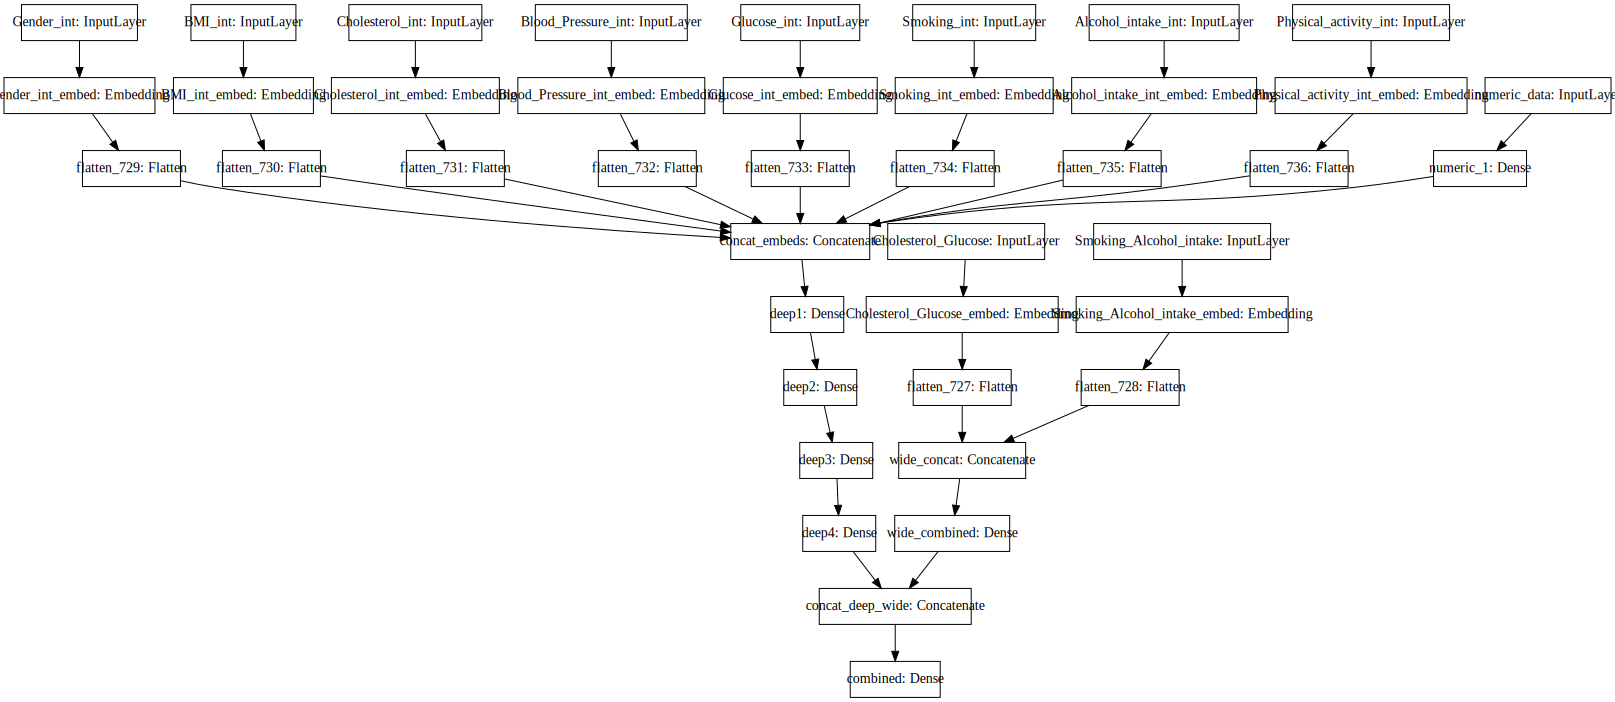

In [59]:
SVG(model_to_dot(model_1_layer3).create(prog='dot', format='svg'))

In [60]:
from sklearn.model_selection import StratifiedKFold
costs_wd1_layer3 = []
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=2)
ref = 1

for train_idx, test_idx in kfold.split(X_train, y_train):
    print ('Fold',ref,'in kfold ...')
      
    X_train_temp = X_train.iloc[train_idx]
    y_train_temp = y_train[train_idx]
    X_test_temp = X_train.iloc[test_idx]
    y_test_temp = y_train[test_idx]
    
    # take cost
    history,model,c,pred = wide_and_deep1_layer3(X_train_temp,X_test_temp,y_train_temp,y_test_temp,0,25) # last two are verbose and epochs
    costs_wd1_layer3.append(c)

    print(mt.confusion_matrix(y_test_temp,pred), "=>", c)
    ref+=1

print(costs_wd1_layer3)

Fold 1 in kfold ...
[[1.]
 [1.]
 [0.]
 ...
 [0.]
 [1.]
 [1.]] [1 1 0 ... 1 1 1]
[[2061  731]
 [ 777 2032]] => 0.7293610911701364
Fold 2 in kfold ...
[[0.]
 [1.]
 [1.]
 ...
 [0.]
 [1.]
 [1.]] [1 1 0 ... 0 1 0]
[[2163  629]
 [ 855 1954]] => 0.7247774480712167
Fold 3 in kfold ...
[[1.]
 [0.]
 [0.]
 ...
 [1.]
 [1.]
 [0.]] [1 0 1 ... 0 1 0]
[[2150  642]
 [ 859 1950]] => 0.7220885021292354
Fold 4 in kfold ...
[[0.]
 [0.]
 [1.]
 ...
 [1.]
 [0.]
 [1.]] [0 1 1 ... 0 1 0]
[[2167  625]
 [ 804 2005]] => 0.7372678801250229
Fold 5 in kfold ...
[[1.]
 [0.]
 [1.]
 ...
 [1.]
 [0.]
 [0.]] [1 0 0 ... 1 0 0]
[[2347  445]
 [1073 1736]] => 0.6957915831663326
Fold 6 in kfold ...
[[1.]
 [0.]
 [1.]
 ...
 [0.]
 [0.]
 [0.]] [1 0 1 ... 0 1 0]
[[2280  511]
 [ 960 1848]] => 0.7153086897619509
Fold 7 in kfold ...
[[0.]
 [0.]
 [0.]
 ...
 [1.]
 [1.]
 [1.]] [1 0 0 ... 1 0 1]
[[2199  592]
 [ 904 1904]] => 0.717948717948718
Fold 8 in kfold ...
[[0.]
 [0.]
 [1.]
 ...
 [1.]
 [1.]
 [0.]] [1 0 1 ... 1 1 0]
[[2169  622]
 [ 85

In [61]:
c1_layer3_avg = np.mean(costs_wd1_layer3)
print(c1_layer3_avg)
f1_costs.append(c1_layer3_avg)

0.7218171994085234


### Model 2 with 4 layers in deep branch

In [29]:
#'Gender','BMI','Cholesterol','Blood_Pressure','Glucose', 'Smoking','Alcohol_intake','Physical_activity','Cardio_disease'

def wide_and_deep2_layer3(X_train,X_test,y_train,y_test,v=0,epo=1):
    X_train_num =  X_train[numeric_headers].values
    X_test_num = X_test[numeric_headers].values
    
    cross_columns = [["Cholesterol","Alcohol_intake"],
                     ["BMI","Blood_Pressure"],
                     ["Cholesterol","Glucose"],
                     ["Glucose","Physical_activity"]]


    # we need to create separate lists for each branch
    embed_branches = []
    X_ints_train = []
    X_ints_test = []
    all_inputs = []
    all_wide_branch_outputs = []

    for cols in cross_columns:
        # encode crossed columns as ints for the embedding
        enc = LabelEncoder()

        # create crossed labels
        X_crossed_train = X_train[cols].apply(lambda x: '_'.join(str(x)), axis=1, raw = True)
        X_crossed_test = X_test[cols].apply(lambda x: '_'.join(str(x)), axis=1, raw = True)

        enc.fit(np.hstack((X_crossed_train.values,  X_crossed_test.values)))
        X_crossed_train = enc.transform(X_crossed_train)
        X_crossed_test = enc.transform(X_crossed_test)
        X_ints_train.append( X_crossed_train )
        X_ints_test.append( X_crossed_test )

        # get the number of categories
        N = max(X_ints_train[-1]+1) # same as the max(df_train[col])

        # create embedding branch from the number of categories
        inputs = Input(shape=(1,),dtype='int32', name = '_'.join(cols))
        all_inputs.append(inputs)
        x = Embedding(input_dim=N, 
                      output_dim=int(np.sqrt(N)), 
                      input_length=1, name = '_'.join(cols)+'_embed')(inputs)
        x = Flatten()(x)
        all_wide_branch_outputs.append(x)

    # merge the branches together
    wide_branch = concatenate(all_wide_branch_outputs, name='wide_concat')
    wide_branch = Dense(units=16,activation='relu',name='wide_combined')(wide_branch)

    # reset this input branch
    all_deep_branch_outputs = []
    # add in the embeddings
    for col in categorical_headers_ints:
        # encode as ints for the embedding
        X_ints_train.append( X_train[col].values )
        X_ints_test.append( X_test[col].values )

        # get the number of categories
        N = max(X_ints_train[-1]+1) # same as the max(df_train[col])

        # create embedding branch from the number of categories
        inputs = Input(shape=(1,),dtype='int32', name=col)
        all_inputs.append(inputs)
        x = Embedding(input_dim=N, 
                      output_dim=int(np.sqrt(N)), 
                      input_length=1, name=col+'_embed')(inputs)
        x = Flatten()(x)
        all_deep_branch_outputs.append(x)

    # also get a dense branch of the numeric features
    all_inputs.append(Input(shape=(X_train_num.shape[1],),
                            sparse=False,
                            name='numeric_data'))

    x = Dense(units=20, activation='relu',name='numeric_1')(all_inputs[-1])
    all_deep_branch_outputs.append( x )

    # merge the deep branches together
    deep_branch = concatenate(all_deep_branch_outputs,name='concat_embeds')
    deep_branch = Dense(units=50,activation='relu', name='deep1')(deep_branch)
    deep_branch = Dense(units=30,activation='relu', name='deep2')(deep_branch)
    deep_branch = Dense(units=20,activation='relu', name='deep3')(deep_branch)
    deep_branch = Dense(units=10,activation='relu', name='deep4')(deep_branch)

    final_branch = concatenate([wide_branch, deep_branch],name='concat_deep_wide')
    final_branch = Dense(units=1,activation='sigmoid',name='combined')(final_branch)

    model = Model(inputs=all_inputs, outputs=final_branch)

    def recall_m(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

    def precision_m(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision
    
    def f1_m(y_true, y_pred):
        precision = precision_m(y_true, y_pred)
        recall = recall_m(y_true, y_pred)
        return 2*((precision*recall)/(precision+recall+K.epsilon()))
    
    model.compile(optimizer='Adam',
              loss='mean_squared_error',
              metrics=['accuracy',f1_m])

    # lets also add the history variable to see how we are doing
    # and lets add a validation set to keep track of our progress
    history = model.fit(X_ints_train+ [X_train_num],
                        y_train, 
                        epochs=epo, 
                        batch_size=50, 
                        verbose=v, 
                        validation_data = (X_ints_test + [X_test_num], y_test))
    
    pred_proba = model.predict(X_ints_test + [X_test_num])
    #pred = np.round(np.argmax(model.predict(X_ints_test + [X_test_num]),axis=1))
    pred = np.round(pred_proba)
    print(pred,y_test)
    
    c = f1_score(y_test, pred)
    
    return history,model,c,pred

In [63]:
history_2_layer3,model_2_layer3,c_2_layer3,pred_2_layer3 = wide_and_deep2_layer3(X_train,X_test,y_train,y_test,1,25) # last two are verbose and epochs
model_2_layer3.summary()

Train on 56000 samples, validate on 14000 samples
Epoch 1/25
56000/56000 [==============================] - 38s 675us/step - loss: 0.1901 - acc: 0.7229 - f1_m: 0.7151 - val_loss: 0.1851 - val_acc: 0.7306 - val_f1_m: 0.7058
Epoch 2/25
56000/56000 [==============================] - 19s 346us/step - loss: 0.1821 - acc: 0.7332 - f1_m: 0.7184 - val_loss: 0.1841 - val_acc: 0.7283 - val_f1_m: 0.7185
Epoch 3/25
56000/56000 [==============================] - 19s 346us/step - loss: 0.1815 - acc: 0.7337 - f1_m: 0.7196 - val_loss: 0.1835 - val_acc: 0.7311 - val_f1_m: 0.7024
Epoch 4/25
56000/56000 [==============================] - 19s 348us/step - loss: 0.1810 - acc: 0.7358 - f1_m: 0.7209 - val_loss: 0.1829 - val_acc: 0.7324 - val_f1_m: 0.7153
Epoch 5/25
56000/56000 [==============================] - 20s 349us/step - loss: 0.1807 - acc: 0.7348 - f1_m: 0.7198 - val_loss: 0.1828 - val_acc: 0.7314 - val_f1_m: 0.7187
Epoch 6/25
56000/56000 [==============================] - 19s 347us/step - loss: 0.18

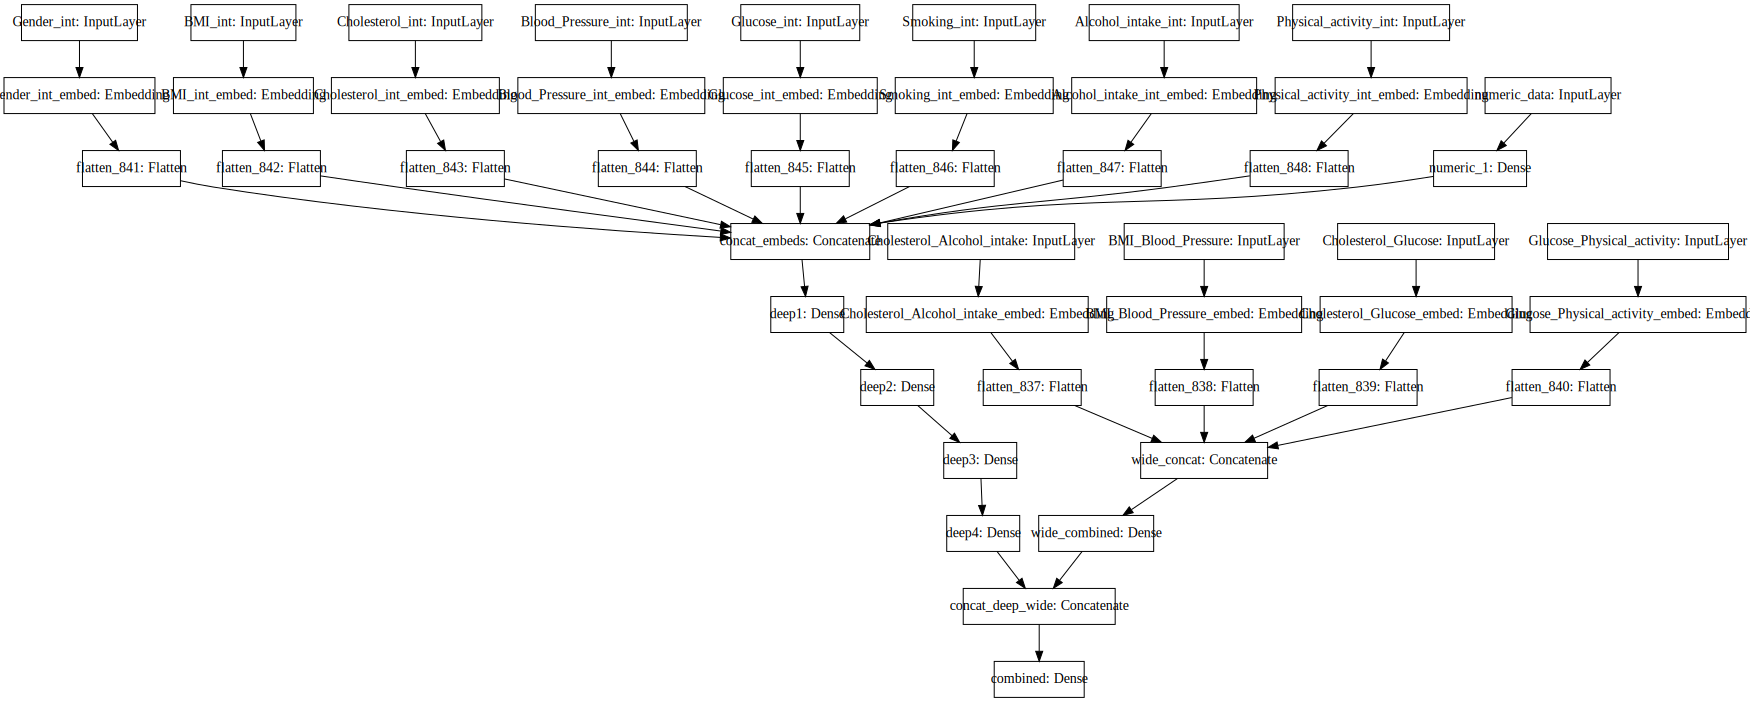

In [64]:
SVG(model_to_dot(model_2_layer3).create(prog='dot', format='svg'))

In [65]:
from sklearn.model_selection import StratifiedKFold
costs_wd2_layer3 = []
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=2)
ref = 1

for train_idx, test_idx in kfold.split(X_train, y_train):
    print ('Fold',ref,'in kfold ...')
   
    X_train_temp = X_train.iloc[train_idx]
    y_train_temp = y_train[train_idx]
    X_test_temp = X_train.iloc[test_idx]
    y_test_temp = y_train[test_idx]
     
    # take cost
    history,model,c,pred = wide_and_deep2_layer3(X_train_temp,X_test_temp,y_train_temp,y_test_temp,0,25) # last two are verbose and epochs
    costs_wd2_layer3.append(c)
    
    print(mt.confusion_matrix(y_test_temp,pred), "=>", c)
    ref+=1

print(costs_wd2_layer3)

Fold 1 in kfold ...
[[1.]
 [1.]
 [0.]
 ...
 [0.]
 [1.]
 [1.]] [1 1 0 ... 1 1 1]
[[2129  663]
 [ 839 1970]] => 0.7239985299522236
Fold 2 in kfold ...
[[0.]
 [1.]
 [1.]
 ...
 [0.]
 [1.]
 [1.]] [1 1 0 ... 0 1 0]
[[2242  550]
 [ 916 1893]] => 0.7208682406702209
Fold 3 in kfold ...
[[1.]
 [0.]
 [0.]
 ...
 [1.]
 [1.]
 [0.]] [1 0 1 ... 0 1 0]
[[2080  712]
 [ 798 2011]] => 0.7270426608821402
Fold 4 in kfold ...
[[0.]
 [0.]
 [0.]
 ...
 [1.]
 [0.]
 [1.]] [0 1 1 ... 0 1 0]
[[2144  648]
 [ 810 1999]] => 0.7327712609970675
Fold 5 in kfold ...
[[1.]
 [0.]
 [1.]
 ...
 [1.]
 [0.]
 [0.]] [1 0 0 ... 1 0 0]
[[2244  548]
 [ 957 1852]] => 0.7110769821462853
Fold 6 in kfold ...
[[1.]
 [0.]
 [1.]
 ...
 [0.]
 [1.]
 [0.]] [1 0 1 ... 0 1 0]
[[2155  636]
 [ 827 1981]] => 0.7303225806451613
Fold 7 in kfold ...
[[0.]
 [0.]
 [0.]
 ...
 [1.]
 [1.]
 [1.]] [1 0 0 ... 1 0 1]
[[2127  664]
 [ 840 1968]] => 0.723529411764706
Fold 8 in kfold ...
[[0.]
 [0.]
 [1.]
 ...
 [1.]
 [1.]
 [0.]] [1 0 1 ... 1 1 0]
[[2185  606]
 [ 90

In [66]:
c2_layer3_avg = np.mean(costs_wd2_layer3)
print(c2_layer3_avg)
f1_costs.append(c2_layer3_avg)

0.7228874970096155


### Model 3 with 4 layers in deep branch

In [30]:
#'Gender','BMI','Cholesterol','Blood_Pressure','Glucose', 'Smoking','Alcohol_intake','Physical_activity','Cardio_diseaseRisk_group'

def wide_and_deep3_layer3(X_train,X_test,y_train,y_test,v=0,epo=1):
    X_train_num =  X_train[numeric_headers].values
    X_test_num = X_test[numeric_headers].values
    
    cross_columns = [['BMI','Cholesterol','Blood_Pressure'],
                     ["Smoking","Alcohol_intake"],
                     ["Glucose","Physical_activity"]]

    # we need to create separate lists for each branch
    embed_branches = []
    X_ints_train = []
    X_ints_test = []
    all_inputs = []
    all_wide_branch_outputs = []

    for cols in cross_columns:
        # encode crossed columns as ints for the embedding
        enc = LabelEncoder()

        # create crossed labels
        X_crossed_train = X_train[cols].apply(lambda x: '_'.join(str(x)), axis=1, raw = True)
        X_crossed_test = X_test[cols].apply(lambda x: '_'.join(str(x)), axis=1, raw = True)

        enc.fit(np.hstack((X_crossed_train.values,  X_crossed_test.values)))
        X_crossed_train = enc.transform(X_crossed_train)
        X_crossed_test = enc.transform(X_crossed_test)
        X_ints_train.append( X_crossed_train )
        X_ints_test.append( X_crossed_test )

        # get the number of categories
        N = max(X_ints_train[-1]+1) # same as the max(df_train[col])

        # create embedding branch from the number of categories
        inputs = Input(shape=(1,),dtype='int32', name = '_'.join(cols))
        all_inputs.append(inputs)
        x = Embedding(input_dim=N, 
                      output_dim=int(np.sqrt(N)), 
                      input_length=1, name = '_'.join(cols)+'_embed')(inputs)
        x = Flatten()(x)
        all_wide_branch_outputs.append(x)

    # merge the branches together
    wide_branch = concatenate(all_wide_branch_outputs, name='wide_concat')
    wide_branch = Dense(units=16,activation='relu',name='wide_combined')(wide_branch)

    # reset this input branch
    all_deep_branch_outputs = []
    # add in the embeddings
    for col in categorical_headers_ints:
        # encode as ints for the embedding
        X_ints_train.append( X_train[col].values )
        X_ints_test.append( X_test[col].values )

        # get the number of categories
        N = max(X_ints_train[-1]+1) # same as the max(df_train[col])

        # create embedding branch from the number of categories
        inputs = Input(shape=(1,),dtype='int32', name=col)
        all_inputs.append(inputs)
        x = Embedding(input_dim=N, 
                      output_dim=int(np.sqrt(N)), 
                      input_length=1, name=col+'_embed')(inputs)
        x = Flatten()(x)
        all_deep_branch_outputs.append(x)

    # also get a dense branch of the numeric features
    all_inputs.append(Input(shape=(X_train_num.shape[1],),
                            sparse=False,
                            name='numeric_data'))

    x = Dense(units=20, activation='relu',name='numeric_1')(all_inputs[-1])
    all_deep_branch_outputs.append( x )

    # merge the deep branches together
    deep_branch = concatenate(all_deep_branch_outputs,name='concat_embeds')
    deep_branch = Dense(units=50,activation='relu', name='deep1')(deep_branch)
    deep_branch = Dense(units=30,activation='relu', name='deep2')(deep_branch)
    deep_branch = Dense(units=20,activation='relu', name='deep3')(deep_branch)
    deep_branch = Dense(units=10,activation='relu', name='deep4')(deep_branch)

    final_branch = concatenate([wide_branch, deep_branch],name='concat_deep_wide')
    final_branch = Dense(units=1,activation='sigmoid',name='combined')(final_branch)

    model = Model(inputs=all_inputs, outputs=final_branch)

    def recall_m(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

    def precision_m(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision
    
    def f1_m(y_true, y_pred):
        precision = precision_m(y_true, y_pred)
        recall = recall_m(y_true, y_pred)
        return 2*((precision*recall)/(precision+recall+K.epsilon()))
    
    model.compile(optimizer='Adam',
              loss='binary_crossentropy',
              metrics=['accuracy',f1_m])

    # lets also add the history variable to see how we are doing
    # and lets add a validation set to keep track of our progress
    history = model.fit(X_ints_train+ [X_train_num],
                        y_train, 
                        epochs=epo, 
                        batch_size=50, 
                        verbose=v, 
                        validation_data = (X_ints_test + [X_test_num], y_test))
    
    pred_proba = model.predict(X_ints_test + [X_test_num])
    #pred = np.round(np.argmax(model.predict(X_ints_test + [X_test_num]),axis=1))
    pred = np.round(pred_proba)
    print(pred,y_test)
    
    c = f1_score(y_test, pred)
    
    return history,model,c,pred

In [68]:
history_3_layer3,model_3_layer3,c_3_layer3,pred_3_layer3 = wide_and_deep3_layer3(X_train,X_test,y_train,y_test,1,25) # last two are verbose and epochs
model_3_layer3.summary()

Train on 56000 samples, validate on 14000 samples
Epoch 1/25
56000/56000 [==============================] - 48s 849us/step - loss: 0.5627 - acc: 0.7218 - f1_m: 0.7097 - val_loss: 0.5545 - val_acc: 0.7291 - val_f1_m: 0.7147
Epoch 2/25
56000/56000 [==============================] - 24s 430us/step - loss: 0.5457 - acc: 0.7332 - f1_m: 0.7203 - val_loss: 0.5513 - val_acc: 0.7273 - val_f1_m: 0.7100
Epoch 3/25
56000/56000 [==============================] - 24s 423us/step - loss: 0.5440 - acc: 0.7343 - f1_m: 0.7198 - val_loss: 0.5480 - val_acc: 0.7315 - val_f1_m: 0.7174
Epoch 4/25
56000/56000 [==============================] - 24s 423us/step - loss: 0.5423 - acc: 0.7348 - f1_m: 0.7209 - val_loss: 0.5516 - val_acc: 0.7298 - val_f1_m: 0.6957
Epoch 5/25
56000/56000 [==============================] - 24s 425us/step - loss: 0.5409 - acc: 0.7362 - f1_m: 0.7212 - val_loss: 0.5468 - val_acc: 0.7302 - val_f1_m: 0.7147
Epoch 6/25
56000/56000 [==============================] - 24s 430us/step - loss: 0.54

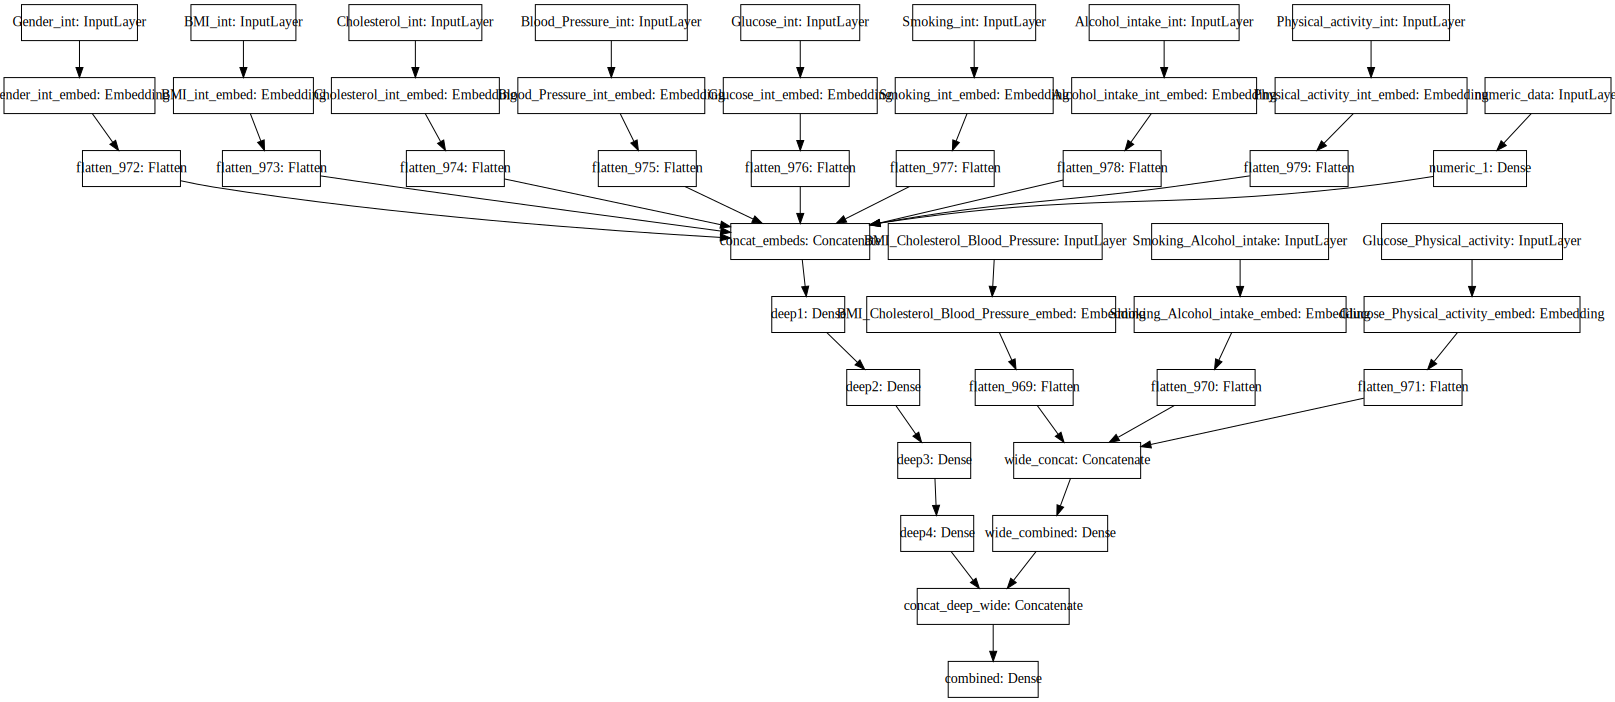

In [69]:
SVG(model_to_dot(model_3_layer3).create(prog='dot', format='svg'))

In [70]:
from sklearn.model_selection import StratifiedKFold
costs_wd3_layer3 = []
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=2)
ref = 1

for train_idx, test_idx in kfold.split(X_train, y_train):
    print ('Fold',ref,'in kfold ...')
   
    X_train_temp = X_train.iloc[train_idx]
    y_train_temp = y_train[train_idx]
    X_test_temp = X_train.iloc[test_idx]
    y_test_temp = y_train[test_idx]
    
    # take cost
    history,model,c,pred = wide_and_deep3_layer3(X_train_temp,X_test_temp,y_train_temp,y_test_temp,0,25) # last two are verbose and epochs
    costs_wd3_layer3.append(c)
    
    print(mt.confusion_matrix(y_test_temp,pred), "=>", c)
    ref+=1

print(costs_wd3_layer3)

Fold 1 in kfold ...
[[1.]
 [1.]
 [0.]
 ...
 [0.]
 [1.]
 [1.]] [1 1 0 ... 1 1 1]
[[2159  633]
 [ 847 1962]] => 0.7261287934863063
Fold 2 in kfold ...
[[0.]
 [1.]
 [1.]
 ...
 [0.]
 [1.]
 [1.]] [1 1 0 ... 0 1 0]
[[2222  570]
 [ 887 1922]] => 0.7251461988304093
Fold 3 in kfold ...
[[1.]
 [0.]
 [0.]
 ...
 [0.]
 [1.]
 [0.]] [1 0 1 ... 0 1 0]
[[2086  706]
 [ 782 2027]] => 0.7315048718874054
Fold 4 in kfold ...
[[0.]
 [0.]
 [0.]
 ...
 [1.]
 [0.]
 [1.]] [0 1 1 ... 0 1 0]
[[2199  593]
 [ 847 1962]] => 0.7315436241610738
Fold 5 in kfold ...
[[1.]
 [0.]
 [1.]
 ...
 [1.]
 [0.]
 [0.]] [1 0 0 ... 1 0 0]
[[2239  553]
 [ 947 1862]] => 0.712863705972435
Fold 6 in kfold ...
[[1.]
 [0.]
 [1.]
 ...
 [0.]
 [1.]
 [0.]] [1 0 1 ... 0 1 0]
[[2205  586]
 [ 866 1942]] => 0.7278860569715141
Fold 7 in kfold ...
[[0.]
 [0.]
 [0.]
 ...
 [1.]
 [1.]
 [1.]] [1 0 0 ... 1 0 1]
[[2249  542]
 [ 970 1838]] => 0.7085582112567463
Fold 8 in kfold ...
[[0.]
 [0.]
 [1.]
 ...
 [1.]
 [1.]
 [0.]] [1 0 1 ... 1 1 0]
[[2179  612]
 [ 89

In [71]:
c3_layer3_avg = np.mean(costs_wd3_layer3)
print(c3_layer3_avg)
f1_costs.append(c3_layer3_avg)

0.722446073305789


We have added layers to the 3 models we created previously. First we add 1 layer in the deep branch so our models now have 3 layers in the deep branch.<br>
We then add one more layer to the deep branch of these models so that the number of layers in the deep branch become 4.<br>
Then we have checked the f1 scores for all of the above models using stratified 10-fold cross validation for the purpose of investigating the generalization performance.<br>
The model that has best performance among all other models is the one with 2 layer in the deep branch.

In [72]:
print(f1_costs)

[0.7251135536298587, 0.7259732173378513, 0.7268397925357709, 0.7262257003278829, 0.7265124416663398, 0.7233407590746918, 0.7218171994085234, 0.7228874970096155, 0.722446073305789]


In [73]:
output = np.zeros((3,3))

In [74]:
output[0,0] = c1_layer1_avg
output[0,1] = c1_layer2_avg
output[0,2] = c1_layer3_avg
output[1,0] = c2_layer1_avg
output[1,1] = c2_layer2_avg
output[1,2] = c2_layer3_avg
output[2,0] = c3_layer1_avg
output[2,1] = c3_layer2_avg
output[2,2] = c3_layer3_avg

In [75]:
np.save('lab5_output_file', output)

In [76]:
output1 = np.load('lab5_output_file.npy')
print(output1)

[[0.72511355 0.7262257  0.7218172 ]
 [0.72597322 0.72651244 0.7228875 ]
 [0.72683979 0.72334076 0.72244607]]


Since this take long time for the cross-validation, we have saved outputs in the npy file. each row has output of one model for differen layers. As said above, the model 3 with 2 layers performers best. We are going to compare this model with MLP.

## Comparison with MLP

In [77]:
def plotROC1 (n_classes,y_test_bin,y_score):
    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_score.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
    
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

    # Then interpolate all ROC curves at this points
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += interp(all_fpr, fpr[i], tpr[i])
    
    # Finally average it and compute AUC
    mean_tpr /= n_classes

    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

     # Plot all ROC curves
    plt.figure()
    lw = 2
    #plt.plot(fpr["micro"], tpr["micro"],
    #         label='micro-average ROC curve (area = {0:0.2f})'
    #               ''.format(roc_auc["micro"]),
    #         color='deeppink', linestyle=':', linewidth=4)

    plt.plot(fpr["macro"], tpr["macro"],
             label='macro-average ROC curve (area = {0:0.2f})'
                   ''.format(roc_auc["macro"]),
             color='navy', linestyle=':', linewidth=4)

    colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=lw,
                 label='ROC curve of class {0} (area = {1:0.2f})'
                 ''.format(i, roc_auc[i]))
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()
    
    print("Area under the curve : ", roc_auc)

#### Our best model

In [31]:
#'Gender','BMI','Cholesterol','Blood_Pressure','Glucose', 'Smoking','Alcohol_intake','Physical_activity','Cardio_disease'

def wide_and_deep_best_model(X_train,X_test,y_train,y_test,v=0,epo=1):
    X_train_num =  X_train[numeric_headers].values
    X_test_num = X_test[numeric_headers].values
    #cross_ colums are taken from model 3 layer_2.
    cross_columns = [['BMI','Cholesterol','Blood_Pressure'],
                     ["Smoking","Alcohol_intake"],
                     ["Glucose","Physical_activity"]]

    # we need to create separate lists for each branch
    embed_branches = []
    X_ints_train = []
    X_ints_test = []
    all_inputs = []
    all_wide_branch_outputs = []

    for cols in cross_columns:
        # encode crossed columns as ints for the embedding
        enc = LabelEncoder()

        # create crossed labels
        X_crossed_train = X_train[cols].apply(lambda x: '_'.join(str(x)), axis=1, raw = True)
        X_crossed_test = X_test[cols].apply(lambda x: '_'.join(str(x)), axis=1, raw = True)

        enc.fit(np.hstack((X_crossed_train.values,  X_crossed_test.values)))
        X_crossed_train = enc.transform(X_crossed_train)
        X_crossed_test = enc.transform(X_crossed_test)
        X_ints_train.append( X_crossed_train )
        X_ints_test.append( X_crossed_test )

        # get the number of categories
        N = max(X_ints_train[-1]+1) # same as the max(df_train[col])

        # create embedding branch from the number of categories
        inputs = Input(shape=(1,),dtype='int32', name = '_'.join(cols))
        all_inputs.append(inputs)
        x = Embedding(input_dim=N, 
                      output_dim=int(np.sqrt(N)), 
                      input_length=1, name = '_'.join(cols)+'_embed')(inputs)
        x = Flatten()(x)
        all_wide_branch_outputs.append(x)

    # merge the branches together
    wide_branch = concatenate(all_wide_branch_outputs, name='wide_concat')
    wide_branch = Dense(units=16,activation='relu',name='wide_combined')(wide_branch)

    # reset this input branch
    all_deep_branch_outputs = []
    # add in the embeddings
    for col in categorical_headers_ints:
        # encode as ints for the embedding
        X_ints_train.append( X_train[col].values )
        X_ints_test.append( X_test[col].values )

        # get the number of categories
        N = max(X_ints_train[-1]+1) # same as the max(df_train[col])

        # create embedding branch from the number of categories
        inputs = Input(shape=(1,),dtype='int32', name=col)
        all_inputs.append(inputs)
        x = Embedding(input_dim=N, 
                      output_dim=int(np.sqrt(N)), 
                      input_length=1, name=col+'_embed')(inputs)
        x = Flatten()(x)
        all_deep_branch_outputs.append(x)

    # also get a dense branch of the numeric features
    all_inputs.append(Input(shape=(X_train_num.shape[1],),
                            sparse=False,
                            name='numeric_data'))

    x = Dense(units=20, activation='relu',name='numeric_1')(all_inputs[-1])
    all_deep_branch_outputs.append( x )

    # merge the deep branches together
    deep_branch = concatenate(all_deep_branch_outputs,name='concat_embeds')
    deep_branch = Dense(units=50,activation='relu', name='deep1')(deep_branch)
    deep_branch = Dense(units=10,activation='relu', name='deep2')(deep_branch)

    final_branch = concatenate([wide_branch, deep_branch],name='concat_deep_wide')
    final_branch = Dense(units=1,activation='sigmoid',name='combined')(final_branch)

    model = Model(inputs=all_inputs, outputs=final_branch)

    def recall_m(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

    def precision_m(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision
    
    def f1_m(y_true, y_pred):
        precision = precision_m(y_true, y_pred)
        recall = recall_m(y_true, y_pred)
        return 2*((precision*recall)/(precision+recall+K.epsilon()))
    
    model.compile(optimizer='Adam',
              loss='mean_squared_error',
              metrics=['accuracy',f1_m])

    # lets also add the history variable to see how we are doing
    # and lets add a validation set to keep track of our progress
    history = model.fit(X_ints_train+ [X_train_num],
                        y_train, 
                        epochs=epo, 
                        batch_size=50, 
                        verbose=v, 
                        validation_data = (X_ints_test + [X_test_num], y_test))
    
    pred_proba = model.predict(X_ints_test + [X_test_num])
    #pred = np.round(np.argmax(model.predict(X_ints_test + [X_test_num]),axis=1))
    pred = np.round(pred_proba)
    print(pred,y_test)
    
    c = f1_score(y_test, pred)
    prob = model.predict(X_ints_test + [X_test_num])
    
    return history,model,c,pred,prob

In [79]:
%%time
from sklearn.model_selection import StratifiedKFold
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=2)
ref = 1

for train_idx, test_idx in kfold.split(X_train, y_train):
    X_train_temp = X_train.iloc[train_idx]
    y_train_temp = y_train[train_idx]
    X_test_temp = X_train.iloc[test_idx]
    y_test_temp = y_train[test_idx]
    
    # fit on train and predict on test
    print ('Fold',ref,'in kfold ...')
    history_best,model_best,c_best,pred_best,prob_best = wide_and_deep_best_model(X_train_temp,X_test_temp,y_train_temp,y_test_temp,0,25) # last two are verbose and epochs
    model_best.summary()
    ref += 1
    print('Validation F1 score:',c_best)

Fold 1 in kfold ...
[[1.]
 [1.]
 [0.]
 ...
 [0.]
 [1.]
 [1.]] [1 1 0 ... 1 1 1]
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Gender_int (InputLayer)         (None, 1)            0                                            
__________________________________________________________________________________________________
BMI_int (InputLayer)            (None, 1)            0                                            
__________________________________________________________________________________________________
Cholesterol_int (InputLayer)    (None, 1)            0                                            
__________________________________________________________________________________________________
Blood_Pressure_int (InputLayer) (None, 1)            0                                            
_____________________________

[[0.]
 [1.]
 [1.]
 ...
 [0.]
 [1.]
 [1.]] [1 1 0 ... 0 1 0]
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Gender_int (InputLayer)         (None, 1)            0                                            
__________________________________________________________________________________________________
BMI_int (InputLayer)            (None, 1)            0                                            
__________________________________________________________________________________________________
Cholesterol_int (InputLayer)    (None, 1)            0                                            
__________________________________________________________________________________________________
Blood_Pressure_int (InputLayer) (None, 1)            0                                            
_________________________________________________

[[1.]
 [0.]
 [0.]
 ...
 [0.]
 [1.]
 [0.]] [1 0 1 ... 0 1 0]
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Gender_int (InputLayer)         (None, 1)            0                                            
__________________________________________________________________________________________________
BMI_int (InputLayer)            (None, 1)            0                                            
__________________________________________________________________________________________________
Cholesterol_int (InputLayer)    (None, 1)            0                                            
__________________________________________________________________________________________________
Blood_Pressure_int (InputLayer) (None, 1)            0                                            
_________________________________________________

[[0.]
 [0.]
 [1.]
 ...
 [1.]
 [0.]
 [1.]] [0 1 1 ... 0 1 0]
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Gender_int (InputLayer)         (None, 1)            0                                            
__________________________________________________________________________________________________
BMI_int (InputLayer)            (None, 1)            0                                            
__________________________________________________________________________________________________
Cholesterol_int (InputLayer)    (None, 1)            0                                            
__________________________________________________________________________________________________
Blood_Pressure_int (InputLayer) (None, 1)            0                                            
_________________________________________________

[[1.]
 [0.]
 [1.]
 ...
 [1.]
 [0.]
 [0.]] [1 0 0 ... 1 0 0]
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Gender_int (InputLayer)         (None, 1)            0                                            
__________________________________________________________________________________________________
BMI_int (InputLayer)            (None, 1)            0                                            
__________________________________________________________________________________________________
Cholesterol_int (InputLayer)    (None, 1)            0                                            
__________________________________________________________________________________________________
Blood_Pressure_int (InputLayer) (None, 1)            0                                            
_________________________________________________

[[1.]
 [0.]
 [1.]
 ...
 [0.]
 [0.]
 [0.]] [1 0 1 ... 0 1 0]
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Gender_int (InputLayer)         (None, 1)            0                                            
__________________________________________________________________________________________________
BMI_int (InputLayer)            (None, 1)            0                                            
__________________________________________________________________________________________________
Cholesterol_int (InputLayer)    (None, 1)            0                                            
__________________________________________________________________________________________________
Blood_Pressure_int (InputLayer) (None, 1)            0                                            
_________________________________________________

[[0.]
 [0.]
 [0.]
 ...
 [1.]
 [1.]
 [1.]] [1 0 0 ... 1 0 1]
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Gender_int (InputLayer)         (None, 1)            0                                            
__________________________________________________________________________________________________
BMI_int (InputLayer)            (None, 1)            0                                            
__________________________________________________________________________________________________
Cholesterol_int (InputLayer)    (None, 1)            0                                            
__________________________________________________________________________________________________
Blood_Pressure_int (InputLayer) (None, 1)            0                                            
_________________________________________________

[[0.]
 [0.]
 [1.]
 ...
 [1.]
 [1.]
 [0.]] [1 0 1 ... 1 1 0]
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Gender_int (InputLayer)         (None, 1)            0                                            
__________________________________________________________________________________________________
BMI_int (InputLayer)            (None, 1)            0                                            
__________________________________________________________________________________________________
Cholesterol_int (InputLayer)    (None, 1)            0                                            
__________________________________________________________________________________________________
Blood_Pressure_int (InputLayer) (None, 1)            0                                            
_________________________________________________

[[0.]
 [0.]
 [1.]
 ...
 [0.]
 [0.]
 [1.]] [1 0 1 ... 0 0 1]
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Gender_int (InputLayer)         (None, 1)            0                                            
__________________________________________________________________________________________________
BMI_int (InputLayer)            (None, 1)            0                                            
__________________________________________________________________________________________________
Cholesterol_int (InputLayer)    (None, 1)            0                                            
__________________________________________________________________________________________________
Blood_Pressure_int (InputLayer) (None, 1)            0                                            
_________________________________________________

[[0.]
 [0.]
 [0.]
 ...
 [1.]
 [1.]
 [0.]] [1 0 0 ... 0 1 0]
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Gender_int (InputLayer)         (None, 1)            0                                            
__________________________________________________________________________________________________
BMI_int (InputLayer)            (None, 1)            0                                            
__________________________________________________________________________________________________
Cholesterol_int (InputLayer)    (None, 1)            0                                            
__________________________________________________________________________________________________
Blood_Pressure_int (InputLayer) (None, 1)            0                                            
_________________________________________________

#### sklearn's MLP

In [80]:
from sklearn import __version__ as sklearn_version
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

print(sklearn_version)
clf = sk_mlp = MLPClassifier(random_state = 1)

0.19.1


In [81]:
%%time
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=2)
ref = 1

for train_idx, test_idx in kfold.split(X_train[feature_cols], y_train):
    # fit on train and predict on test
    print ('Fold',ref,'in kfold ...')
    clf.fit(X_train[feature_cols].values[train_idx], y_train[train_idx])
    yhat = clf.predict(X_train[feature_cols].values[test_idx])
     
    print('Validation F1 score:',f1_score(yhat,y_train[test_idx]))
    ref += 1

Fold 1 in kfold ...
Validation F1 score: 0.7310998070513945
Fold 2 in kfold ...
Validation F1 score: 0.7264273758601452
Fold 3 in kfold ...
Validation F1 score: 0.7313138555296648
Fold 4 in kfold ...
Validation F1 score: 0.7382264083881286
Fold 5 in kfold ...
Validation F1 score: 0.7291666666666667
Fold 6 in kfold ...
Validation F1 score: 0.7331516802906449
Fold 7 in kfold ...
Validation F1 score: 0.7259851098601778
Fold 8 in kfold ...
Validation F1 score: 0.7264895908111989
Fold 9 in kfold ...
Validation F1 score: 0.7262057582981845
Fold 10 in kfold ...
Validation F1 score: 0.7195864869854163
CPU times: user 3min 1s, sys: 25.1 s, total: 3min 27s
Wall time: 1min 50s


5599


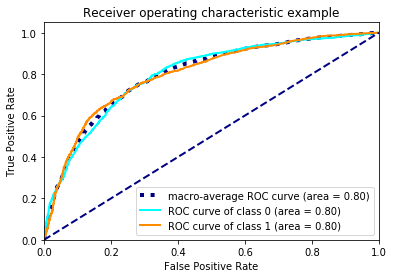

Area under the curve :  {0: 0.7997952183503956, 1: 0.7997952183503957, 'micro': 0.7981518336219622, 'macro': 0.7998995891852773}


In [82]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from scipy import interp
from itertools import cycle

y_score = clf.predict_proba(X_train[feature_cols].values[test_idx])
print(y_score.shape[0])

# Binarize the output
label = label_binarize(y_train[test_idx], classes=[1,0])
y_test_bin = np.hstack((label, 1 - label))
n_classes = y_test_bin.shape[1]

plotROC1(y_score = y_score , y_test_bin = y_test_bin, n_classes= n_classes)

5599


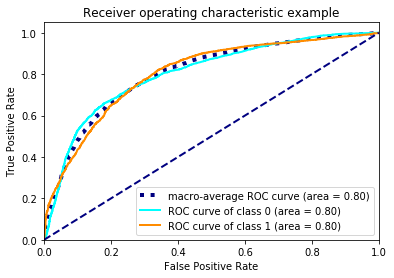

Area under the curve :  {0: 0.8034543393957583, 1: 0.8034543393957582, 'micro': 0.8063547310788697, 'macro': 0.8035615611932924}


In [83]:
y_score_best = prob_best
y_score_bin = np.hstack((y_score_best, 1 - y_score_best))
print(y_score_bin.shape[0])

# Binarize the output
label = label_binarize(y_train[test_idx], classes=[0,1])
y_test_bin = np.hstack((label, 1 - label))
n_classes = y_test_bin.shape[1]

plotROC1(y_score = y_score_bin , y_test_bin = y_test_bin, n_classes= n_classes)

As seen in the above two plots, the performance of MLP and our best model is somewhat similar. The area under the curve for both these models is almost equal.

## Visualize weights with t-SNE

t-Distributed Stochastic Neighbor Embedding (t-SNE) is a non-linear technique for dimensionality reduction. When the dataset has many features it becomes difficult to understand or explore the relationships between the features as it is very difficult to visualize this high dimensional data. In our case, we implement dimensionality reduction to convert this data to a 2 dimensional data in order to visualize it easily.

The algorithms start by calculating the probability of similarity of points in high-dimensional space and in the corresponding low-dimensional space. The similarity of points is calculated as the conditional probability that a point A would choose point B as its neighbor if neighbors were picked in proportion to their probability density under a Gaussian distribution which is centered at A. The difference between these conditional probabilities is then minimized in higher as well as lower dimension. This helps to represent data properly in lower dimensions.

t-Distributed stochastic neighbor embedding (t-SNE) minimizes the divergence between the distribution that measures pairwise similarities of the input data features and a distribution that measures pairwise similarities of the corresponding low-dimensional data points. It finds patterns in the data by identifying observed clusters based on the similarity of data points with multiple features. The input features, however, are not identifiable after doing dimensionality reduction using t-SNE so it is not possible to infer anything from the lower-dimensional data obtained from t-SNE.

Here we will use this process for exploring and visualizing our data.


In [52]:
embedded = [x+'_embed' for x in categorical_headers_ints]
X_emb =[]
for col in embedded:
    print (col)
    X_emb.append(model_3_layer1.get_layer(col).get_weights()[0])
    print (X_emb[-1].shape)

print (len(X_emb))

Gender_int_embed
(2, 1)
BMI_int_embed
(4, 2)
Cholesterol_int_embed
(3, 1)
Blood_Pressure_int_embed
(4, 2)
Glucose_int_embed
(3, 1)
Smoking_int_embed
(2, 1)
Alcohol_intake_int_embed
(2, 1)
Physical_activity_int_embed
(2, 1)
8


In [53]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components = 2, verbose = 1, perplexity = 0.8, n_iter = 3000)
tsne_results = []
for i in range (7):
    tsne_results.append(tsne.fit_transform(np.array(X_emb[i])))

[t-SNE] Computing 1 nearest neighbors...
[t-SNE] Indexed 2 samples in 0.000s...
[t-SNE] Computed neighbors for 2 samples in 0.001s...
[t-SNE] Computed conditional probabilities for sample 2 / 2
[t-SNE] Mean sigma: 0.042772
[t-SNE] KL divergence after 250 iterations with early exaggeration: 29.818880
[t-SNE] Error after 300 iterations: 0.000000
[t-SNE] Computing 3 nearest neighbors...
[t-SNE] Indexed 4 samples in 0.000s...
[t-SNE] Computed neighbors for 4 samples in 0.001s...
[t-SNE] Computed conditional probabilities for sample 4 / 4
[t-SNE] Mean sigma: 0.005092
[t-SNE] KL divergence after 250 iterations with early exaggeration: 37.326809
[t-SNE] Error after 700 iterations: 0.216834
[t-SNE] Computing 2 nearest neighbors...
[t-SNE] Indexed 3 samples in 0.000s...
[t-SNE] Computed neighbors for 3 samples in 0.001s...
[t-SNE] Computed conditional probabilities for sample 3 / 3
[t-SNE] Mean sigma: 0.021984
[t-SNE] KL divergence after 250 iterations with early exaggeration: 39.696320
[t-SNE]

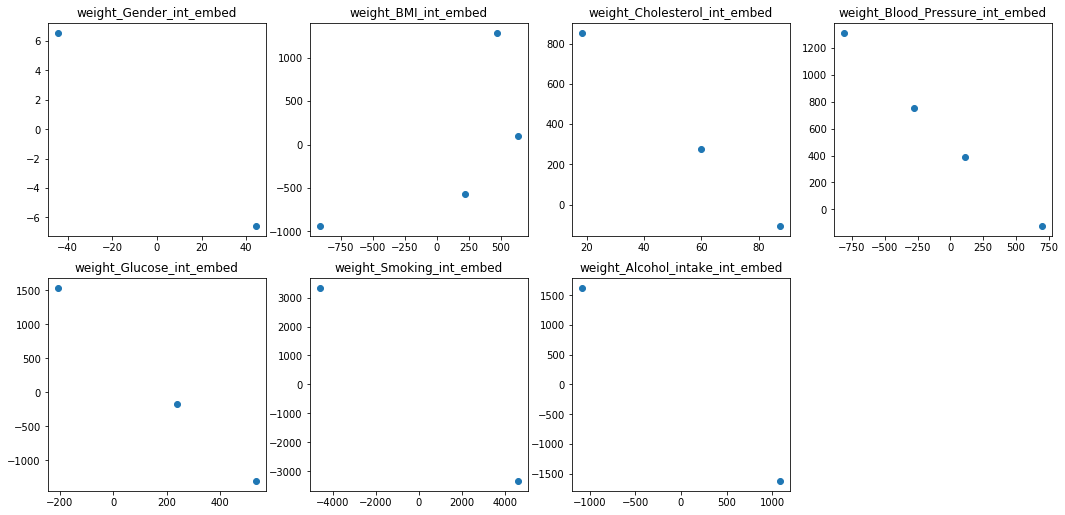

In [54]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0]=18
fig_size[1]=18
for i in range(len(tsne_results)):
    plt.subplot(4,4,i+1)
    temp = tsne_results[i]
    plt.scatter(temp[:,0],temp[:,1])
    plt.title('weight_'+embedded[i])
#plt.colorbar()
plt.show()


The plots above visualize the different features of each category. All weights are scattered on different curves. These curves do not show any clustering since there are plotted separately. Although there are 2 to 4 different features for each category we can observe the behavior of weights. 

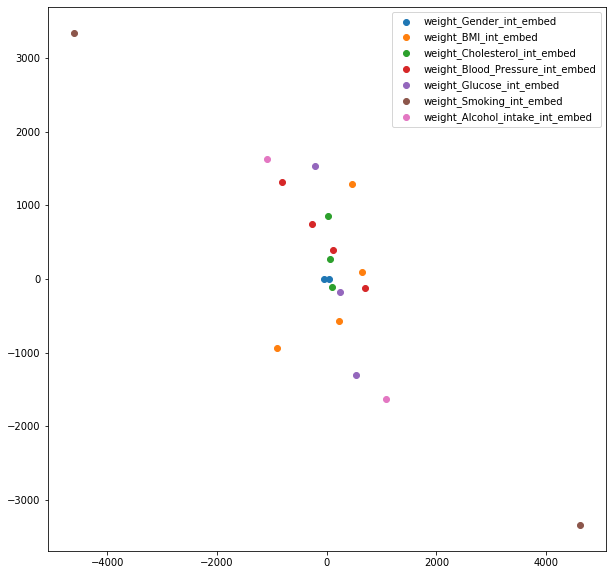

In [55]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0]=10
fig_size[1]=10
legends = []
for i in range(len(tsne_results)):
    temp = tsne_results[i]
    plt.scatter(temp[:,0],temp[:,1])
    legends.append('weight_'+embedded[i])
plt.legend((legends))
plt.show()

In the plot above, all the weights are plotted together. Many of the features are closer and could be clustered from others. We can see, that most of the weight are clustered together around the center, but weight of smokin_int are outlining on the opposide corners. <br>

Since this is not a good cluster to compare all the points together, below we performed another t-SNE visualization. We have changed the dimentionality of some of the weights. 

In [63]:
#damentionality reduction
embedded = [x+'_embed' for x in categorical_headers_ints]
X_emb =[]
for col in embedded:
    print (col)
    X_emb.append(model_3_layer1.get_layer(col).get_weights()[0])
    print (X_emb[-1].shape)

print (len(X_emb))

Gender_int_embed
(2, 1)
BMI_int_embed
(4, 2)
Cholesterol_int_embed
(3, 1)
Blood_Pressure_int_embed
(4, 2)
Glucose_int_embed
(3, 1)
Smoking_int_embed
(2, 1)
Alcohol_intake_int_embed
(2, 1)
Physical_activity_int_embed
(2, 1)
8


In [83]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components = 2, verbose = 1, perplexity = 0.5, n_iter = 300)
tsne_results = []
for i in range (7):
    tsne_results.append(tsne.fit_transform(np.array(X_emb[i])))

[t-SNE] Computing 1 nearest neighbors...
[t-SNE] Indexed 2 samples in 0.000s...
[t-SNE] Computed neighbors for 2 samples in 0.000s...
[t-SNE] Computed conditional probabilities for sample 2 / 2
[t-SNE] Mean sigma: 0.042702
[t-SNE] KL divergence after 250 iterations with early exaggeration: 29.818880
[t-SNE] Error after 300 iterations: 0.000000
[t-SNE] Computing 2 nearest neighbors...
[t-SNE] Indexed 4 samples in 0.000s...
[t-SNE] Computed neighbors for 4 samples in 0.000s...
[t-SNE] Computed conditional probabilities for sample 4 / 4
[t-SNE] Mean sigma: 0.005091
[t-SNE] KL divergence after 250 iterations with early exaggeration: 36.411957
[t-SNE] Error after 300 iterations: 0.293057
[t-SNE] Computing 2 nearest neighbors...
[t-SNE] Indexed 3 samples in 0.000s...
[t-SNE] Computed neighbors for 3 samples in 0.001s...
[t-SNE] Computed conditional probabilities for sample 3 / 3
[t-SNE] Mean sigma: 0.021978
[t-SNE] KL divergence after 250 iterations with early exaggeration: 92.132027
[t-SNE]

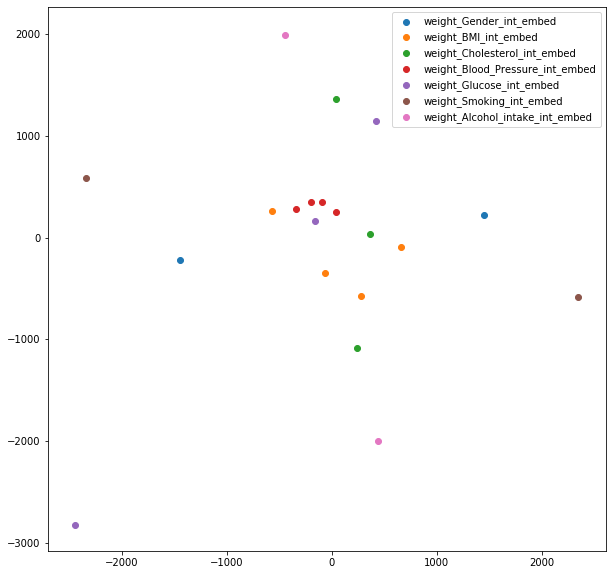

In [84]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0]=10
fig_size[1]=10
legends = []
for i in range(len(tsne_results)):
    temp = tsne_results[i]
    plt.scatter(temp[:,0],temp[:,1])
    legends.append('weight_'+embedded[i])
plt.legend((legends))
plt.show()

After tuning the perplexity parameter, which is responsible for how to balance attention between local and global aspects of our data, the points get loosely.  

In [59]:
embedded = [x+'_embed' for x in categorical_headers_ints]
X_emb =[]
y_emb = []
count = 0
for col in embedded:
    print (col)
    l1 = model_3_layer1.get_layer(col).get_weights()[0]
    l1 = np.hstack((l1,np.zeros((l1.shape[0],11-l1.shape[1]))))
    X_emb.append(l1)
    print (X_emb[-1].shape)

for ele in X_emb:
    y_emb+=[count]*ele.shape[0]
    count+=1

X_emb = np.vstack(tuple(X_emb))
y_emb = np.array(y_emb)

print (X_emb.shape,y_emb.shape)

Gender_int_embed
(2, 11)
BMI_int_embed
(4, 11)
Cholesterol_int_embed
(3, 11)
Blood_Pressure_int_embed
(4, 11)
Glucose_int_embed
(3, 11)
Smoking_int_embed
(2, 11)
Alcohol_intake_int_embed
(2, 11)
Physical_activity_int_embed
(2, 11)
(22, 11) (22,)


In [60]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components = 2, verbose = 1, perplexity = 0.1, n_iter = 3000)
tsne_results = tsne.fit_transform(X_emb)

[t-SNE] Computing 1 nearest neighbors...
[t-SNE] Indexed 22 samples in 0.000s...
[t-SNE] Computed neighbors for 22 samples in 0.001s...
[t-SNE] Computed conditional probabilities for sample 22 / 22
[t-SNE] Mean sigma: 0.000822
[t-SNE] KL divergence after 250 iterations with early exaggeration: 70.178932
[t-SNE] Error after 950 iterations: 1.056514


In [61]:
print('The color in the below plot are related as :')
for i in range(len(embedded)):
    print (str(i),embedded[i])

The color in the below plot are related as :
0 Gender_int_embed
1 BMI_int_embed
2 Cholesterol_int_embed
3 Blood_Pressure_int_embed
4 Glucose_int_embed
5 Smoking_int_embed
6 Alcohol_intake_int_embed
7 Physical_activity_int_embed


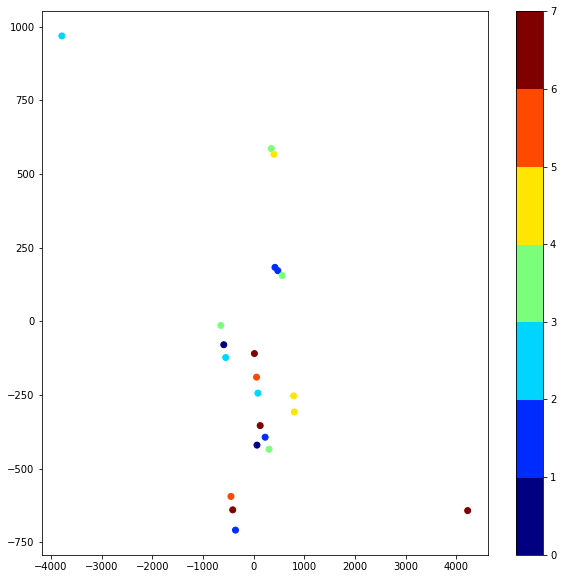

In [62]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0]=10
fig_size[1]=10
plt.scatter(tsne_results[:,0],tsne_results[:,1],c = y_emb, cmap = plt.cm.get_cmap('jet',7))
plt.colorbar()
plt.show()

Finally, the points can be drawn in separated clusters as is seen in the above graph. These points are color-coded for each feature. We can see that many categorical features are close to each other, but the points almost do not overlap. 


# Reference:
Dr. Eric Larson's course at SMU, Fall 2019, https://github.com/eclarson/MachineLearningNotebooks